## Constructing Different MLP Architectures on MNIST Dataset

<h2> Data Overview </h2>

The MNIST Dataset is a dataset of Handwritten Characters pertaining to 10 integers from 0 to 9, which is used for Training in the case of Many Image Processing Tasks. We have an input square image of size (28 px* 28 px), which makes the corresponding vector that we obtain to be 784-dimensional. After this, we obtain a Matrix of this dimensionality where each cell in the Matrix corresponds to an integral number from 0 to 255 -> The Higher is the value of this number, the darker that particular pixel value is. 

There are a total of 60,000 Training Datapoints and a total of 10,000 Test Datapoints in MNIST. We build various models in order to try and minimize our Test Accuracy and Test Log Loss values. We train each of our models on a total of 85 epochs so that the value is not too small for SGD type Optimizations to try and achieve convergence.

In [1]:
# if your keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.initializers import RandomUniform

Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

We carry out the One-Hot Encoding as shown below :

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 1. Number of Hidden Layers in the Neural Network = 2

<h2> 1.1 Architecture 1 :- 784-512-128-10 </h2>

<h3> 1.1.1 Model 1 : Softmax Classifier (Special Case : No Hidden Layers)  </h3>

In [13]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [14]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 85

<h4> 1.1.1.1 Constructing the Neural Network </h4>

In [13]:
# start building a model
arch1_model1 = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

arch1_model1.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

<h4> 1.1.1.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [14]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

arch1_model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

A1M1_history = arch1_model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                       validation_data=(X_test, Y_test)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 1s 18us/step - loss: 1.2781 - accuracy: 0.6961 - val_loss: 0.8107 - val_accuracy: 0.8305
Epoch 2/85
60000/60000 [==============================] - 1s 15us/step - loss: 0.7136 - accuracy: 0.8409 - val_loss: 0.6080 - val_accuracy: 0.8623
Epoch 3/85
60000/60000 [==============================] - 1s 16us/step - loss: 0.5859 - accuracy: 0.8591 - val_loss: 0.5270 - val_accuracy: 0.8761
Epoch 4/85
60000/60000 [==============================] - 1s 15us/step - loss: 0.5249 - accuracy: 0.8687 - val_loss: 0.4814 - val_accuracy: 0.8821
Epoch 5/85
60000/60000 [==============================] - 1s 15us/step - loss: 0.4876 - accuracy: 0.8745 - val_loss: 0.4517 - val_accuracy: 0.8875
Epoch 6/85
60000/60000 [==============================] - 1s 15us/step - loss: 0.4620 - accuracy: 0.8799 - val_loss: 0.4303 - val_accuracy: 0.8907
Epoch 7/85
60000/60000 [==============================] - 1s 15us/st

<h4> 1.1.1.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.2856153622478247
Test accuracy: 0.921500027179718


<IPython.core.display.Javascript object>


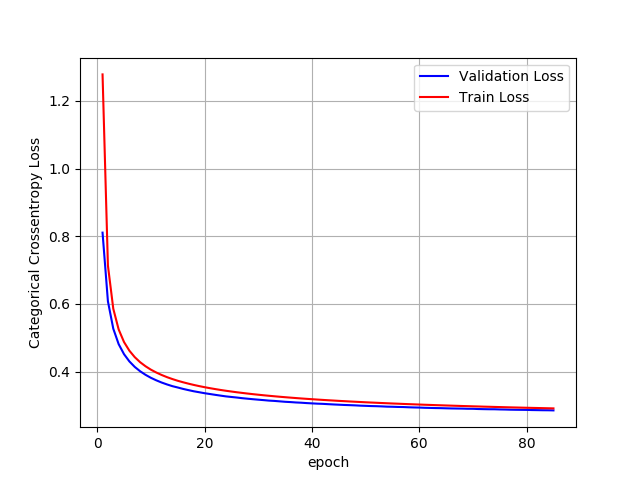

In [15]:
A1M1_score = arch1_model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A1M1_score[0]) 
print('Test accuracy:', A1M1_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.history we will have a list of length equal to number of epochs

vy = A1M1_history.history['val_loss']
ty = A1M1_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h3> 1.1.2 Model 2 : MLP + Sigmoid Activation + SGD Optimizer </h3>

<h4> 1.1.2.1 Constructing the Neural Network </h4>

In [16]:
# Multilayer perceptron

model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


<h4> 1.1.2.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [17]:
model_sigmoid.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

A1M2_history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                               validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 3s 53us/step - loss: 2.2674 - accuracy: 0.2467 - val_loss: 2.2187 - val_accuracy: 0.4493
Epoch 2/85
60000/60000 [==============================] - 3s 51us/step - loss: 2.1729 - accuracy: 0.4515 - val_loss: 2.1172 - val_accuracy: 0.5245
Epoch 3/85
60000/60000 [==============================] - 3s 51us/step - loss: 2.0541 - accuracy: 0.5650 - val_loss: 1.9738 - val_accuracy: 0.5881
Epoch 4/85
60000/60000 [==============================] - 3s 52us/step - loss: 1.8867 - accuracy: 0.6222 - val_loss: 1.7765 - val_accuracy: 0.6899
Epoch 5/85
60000/60000 [==============================] - 3s 52us/step - loss: 1.6719 - accuracy: 0.6700 - val_loss: 1.5434 - val_accuracy: 0.7108
Epoch 6/85
60000/60000 [==============================] - 3s 53us/step - loss: 1.4421 - accuracy: 0.7106 - val_loss: 1.3190 - val_accuracy: 0.7319
Epoch 7/85
60000/60000 [==============================] - 3s 58us/st

<h4> 1.1.2.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.2764148581951857
Test accuracy: 0.919700026512146


<IPython.core.display.Javascript object>


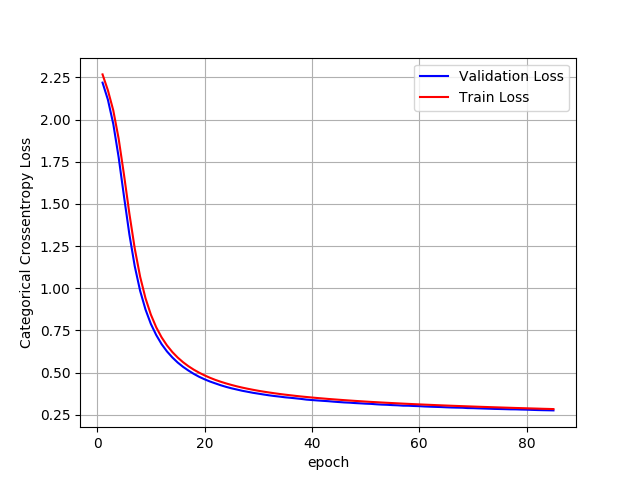

In [18]:
A1M2_score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A1M2_score[0]) 
print('Test accuracy:', A1M2_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = A1M2_history.history['val_loss']
ty = A1M2_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 1.1.2.4 Violin Plots for Hidden Layers in Models Trained </h4>

<IPython.core.display.Javascript object>


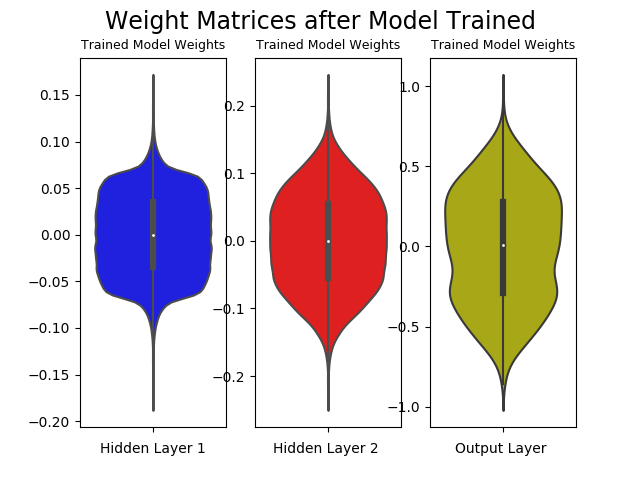

In [19]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 1.1.3 Model 3 : MLP + Sigmoid Activation + ADAM Optimizer </h3>

<h4> 1.1.3.1 Constructing the Neural Network </h4>

In [20]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


<h4> 1.1.3.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [21]:
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A1M3_history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                               validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 5s 80us/step - loss: 0.5264 - accuracy: 0.8603 - val_loss: 0.2464 - val_accuracy: 0.9276
Epoch 2/85
60000/60000 [==============================] - 5s 76us/step - loss: 0.2164 - accuracy: 0.9367 - val_loss: 0.1855 - val_accuracy: 0.9440
Epoch 3/85
60000/60000 [==============================] - 5s 77us/step - loss: 0.1611 - accuracy: 0.9524 - val_loss: 0.1424 - val_accuracy: 0.9571
Epoch 4/85
60000/60000 [==============================] - 5s 83us/step - loss: 0.1240 - accuracy: 0.9635 - val_loss: 0.1189 - val_accuracy: 0.9628
Epoch 5/85
60000/60000 [==============================] - 5s 78us/step - loss: 0.0988 - accuracy: 0.9712 - val_loss: 0.1005 - val_accuracy: 0.9682
Epoch 6/85
60000/60000 [==============================] - 5s 80us/step - loss: 0.0793 - accuracy: 0.9763 - val_loss: 0.1105 - val_accuracy: 0.9661
Epoch 7/85
60000/60000 [==============================] - 5s 77us/st

<h4> 1.1.3.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.09699102172313358
Test accuracy: 0.984000027179718


<IPython.core.display.Javascript object>


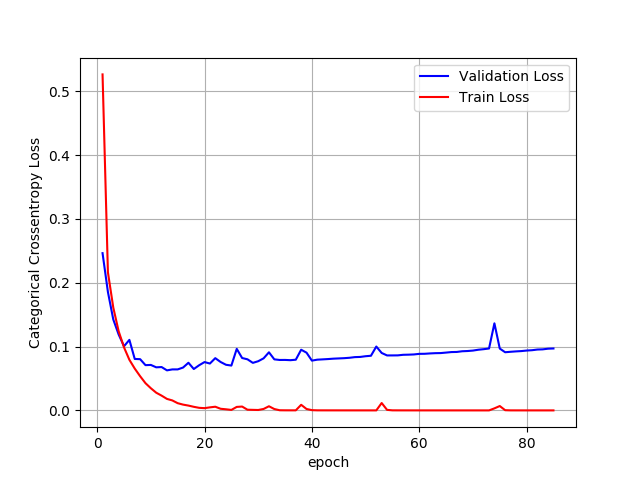

In [22]:
A1M3_score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A1M3_score[0]) 
print('Test accuracy:', A1M3_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.history we will have a list of length equal to number of epochs

vy = A1M3_history.history['val_loss']
ty = A1M3_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 1.1.3.4 Violin Plots for Hidden Layers in Models Trained </h4>

<IPython.core.display.Javascript object>


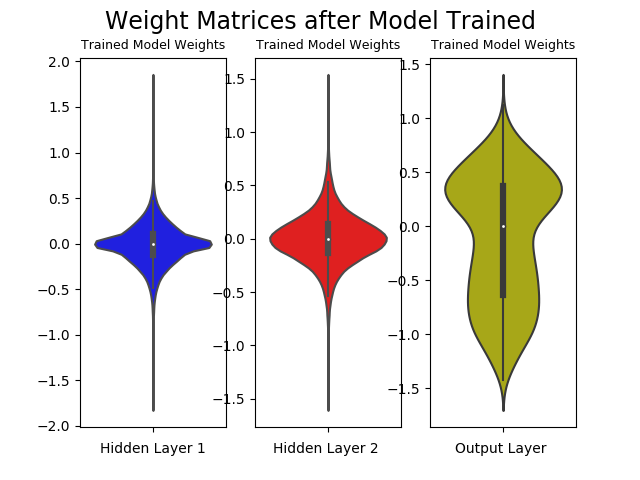

In [23]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 1.1.4 Model 4 : MLP + ReLU Activation + SGD Optimizer </h3>

<h4> 1.1.4.1 Constructing the Neural Network </h4>

In [24]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), \
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', \
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


<h4> 1.1.4.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [25]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

A1M4_history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 3s 56us/step - loss: 0.7811 - accuracy: 0.7820 - val_loss: 0.3999 - val_accuracy: 0.8938
Epoch 2/85
60000/60000 [==============================] - 3s 55us/step - loss: 0.3628 - accuracy: 0.9005 - val_loss: 0.3058 - val_accuracy: 0.9141
Epoch 3/85
60000/60000 [==============================] - 3s 54us/step - loss: 0.2974 - accuracy: 0.9160 - val_loss: 0.2670 - val_accuracy: 0.9251
Epoch 4/85
60000/60000 [==============================] - 3s 57us/step - loss: 0.2625 - accuracy: 0.9256 - val_loss: 0.2446 - val_accuracy: 0.9309
Epoch 5/85
60000/60000 [==============================] - 3s 57us/step - loss: 0.2382 - accuracy: 0.9321 - val_loss: 0.2237 - val_accuracy: 0.9352
Epoch 6/85
60000/60000 [==============================] - 3s 53us/step - loss: 0.2197 - accuracy: 0.9378 - val_loss: 0.2102 - val_accuracy: 0.9386
Epoch 7/85
60000/60000 [==============================] - 3s 54us/st

<h4> 1.1.4.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.07220969564230181
Test accuracy: 0.9771000146865845


<IPython.core.display.Javascript object>


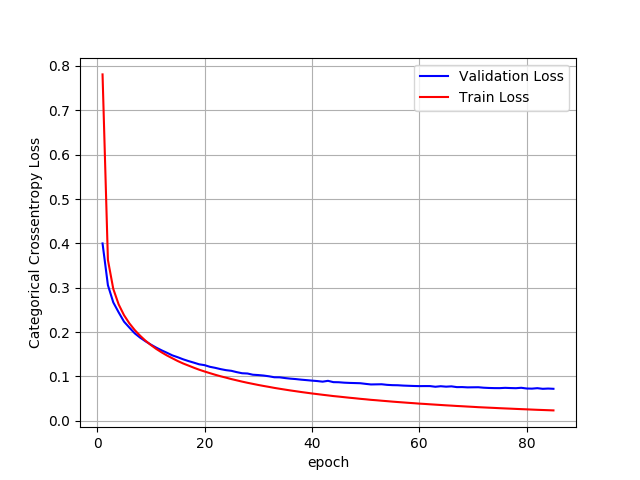

In [26]:
A1M4_score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A1M4_score[0]) 
print('Test accuracy:', A1M4_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A1M4_history.history['val_loss']
ty = A1M4_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 1.1.4.4 Violin Plots for Hidden Layers in Models Trained </h4>

<IPython.core.display.Javascript object>


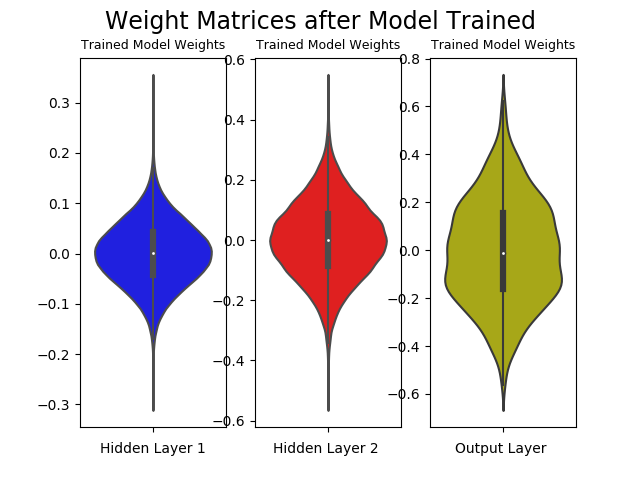

In [27]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 1.1.5 Model 5 : MLP + ReLU Activation + ADAM Optimizer </h3>

<h4> 1.1.5.1 Constructing the Neural Network </h4>

In [28]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,),\
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', \
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None


<h4> 1.1.5.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [29]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A1M5_history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 5s 88us/step - loss: 0.2334 - accuracy: 0.9294 - val_loss: 0.1094 - val_accuracy: 0.9668
Epoch 2/85
60000/60000 [==============================] - 6s 93us/step - loss: 0.0868 - accuracy: 0.9739 - val_loss: 0.0837 - val_accuracy: 0.9734
Epoch 3/85
60000/60000 [==============================] - 5s 87us/step - loss: 0.0530 - accuracy: 0.9834 - val_loss: 0.0750 - val_accuracy: 0.9758
Epoch 4/85
60000/60000 [==============================] - 5s 82us/step - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.0676 - val_accuracy: 0.9786
Epoch 5/85
60000/60000 [==============================] - 5s 84us/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0679 - val_accuracy: 0.9800
Epoch 6/85
60000/60000 [==============================] - 5s 82us/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0710 - val_accuracy: 0.9784
Epoch 7/85
60000/60000 [==============================] - 5s 86us/st

<h4> 1.1.5.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.13787572476952978
Test accuracy: 0.9840999841690063


<IPython.core.display.Javascript object>


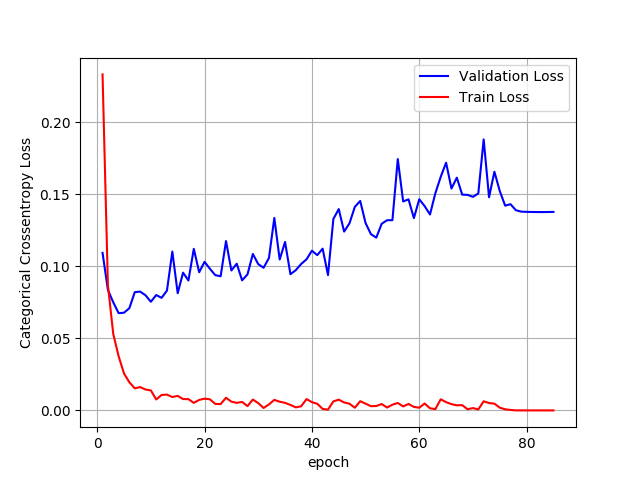

In [30]:
A1M5_score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A1M5_score[0]) 
print('Test accuracy:', A1M5_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = A1M5_history.history['val_loss']
ty = A1M5_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 1.1.5.4 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


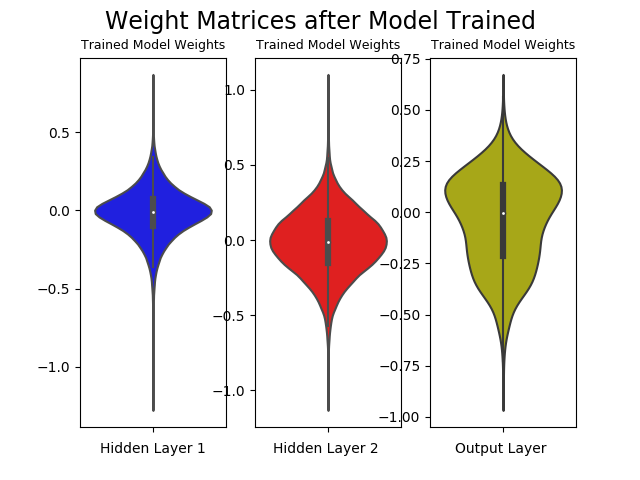

In [31]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 1.1.6 Model 6 : MLP + Batch-Normalization on Hidden Layers + Adam Optimizer </h3>

<h4> 1.1.6.1 Constructing the Neural Network </h4>

In [32]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), \
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', \
                      kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))

model_batch.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


<h4> 1.1.6.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [33]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A1M6_history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                             validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 8s 140us/step - loss: 0.3006 - accuracy: 0.9113 - val_loss: 0.2054 - val_accuracy: 0.9408
Epoch 2/85
60000/60000 [==============================] - 7s 122us/step - loss: 0.1727 - accuracy: 0.9497 - val_loss: 0.1737 - val_accuracy: 0.9497
Epoch 3/85
60000/60000 [==============================] - 7s 123us/step - loss: 0.1370 - accuracy: 0.9590 - val_loss: 0.1463 - val_accuracy: 0.9558
Epoch 4/85
60000/60000 [==============================] - 7s 118us/step - loss: 0.1128 - accuracy: 0.9660 - val_loss: 0.1393 - val_accuracy: 0.9583
Epoch 5/85
60000/60000 [==============================] - 7s 121us/step - loss: 0.0946 - accuracy: 0.9718 - val_loss: 0.1194 - val_accuracy: 0.9639
Epoch 6/85
60000/60000 [==============================] - 7s 116us/step - loss: 0.0771 - accuracy: 0.9768 - val_loss: 0.1163 - val_accuracy: 0.9669
Epoch 7/85
60000/60000 [==============================] - 8s 1

<h4> 1.1.6.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.12687595786054823
Test accuracy: 0.977400004863739


<IPython.core.display.Javascript object>


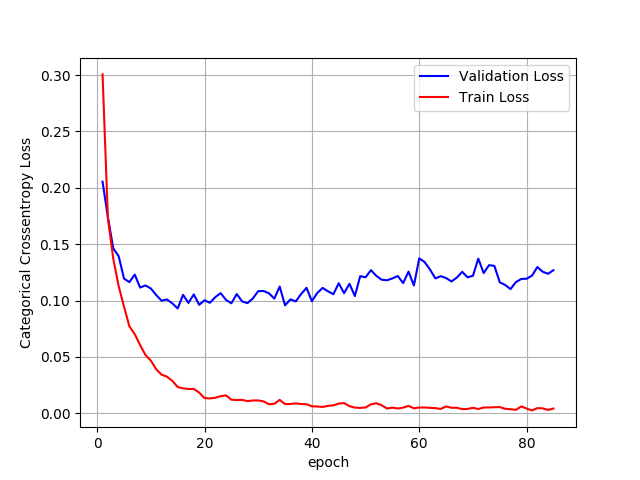

In [34]:
A1M6_score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A1M6_score[0]) 
print('Test accuracy:', A1M6_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.history we will have a list of length equal to number of epochs

vy = A1M6_history.history['val_loss']
ty = A1M6_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 1.1.6.4 Violin Plots for Hidden Layers in Models Trained </h4>

<IPython.core.display.Javascript object>


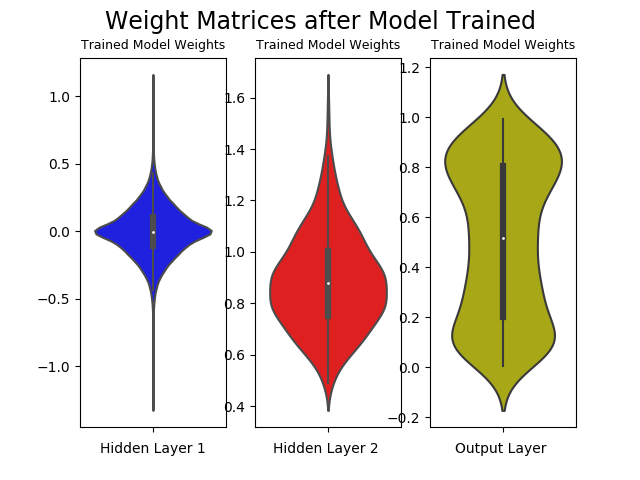

In [35]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 1.1.7 Model 7 : MLP + Batch Normalization + Dropout + Adam Optimizer </h3>

<h4> 1.1.7.1 Constructing the Neural Network </h4>

In [36]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), \
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', \
                     kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

<h4> 1.1.7.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [37]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A1M7_history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 8s 133us/step - loss: 0.6706 - accuracy: 0.7932 - val_loss: 0.2857 - val_accuracy: 0.9147
Epoch 2/85
60000/60000 [==============================] - 7s 117us/step - loss: 0.4309 - accuracy: 0.8688 - val_loss: 0.2515 - val_accuracy: 0.9245
Epoch 3/85
60000/60000 [==============================] - 7s 116us/step - loss: 0.3819 - accuracy: 0.8838 - val_loss: 0.2302 - val_accuracy: 0.9317
Epoch 4/85
60000/60000 [==============================] - 7s 120us/step - loss: 0.3552 - accuracy: 0.8916 - val_loss: 0.2186 - val_accuracy: 0.9336
Epoch 5/85
60000/60000 [==============================] - 7s 117us/step - loss: 0.3360 - accuracy: 0.8987 - val_loss: 0.2089 - val_accuracy: 0.9369
Epoch 6/85
60000/60000 [==============================] - 7s 121us/step - loss: 0.3170 - accuracy: 0.9031 - val_loss: 0.2041 - val_accuracy: 0.9387
Epoch 7/85
60000/60000 [==============================] - 7s 1

<h4> 1.1.7.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.06671037031442392
Test accuracy: 0.983299970626831


<IPython.core.display.Javascript object>


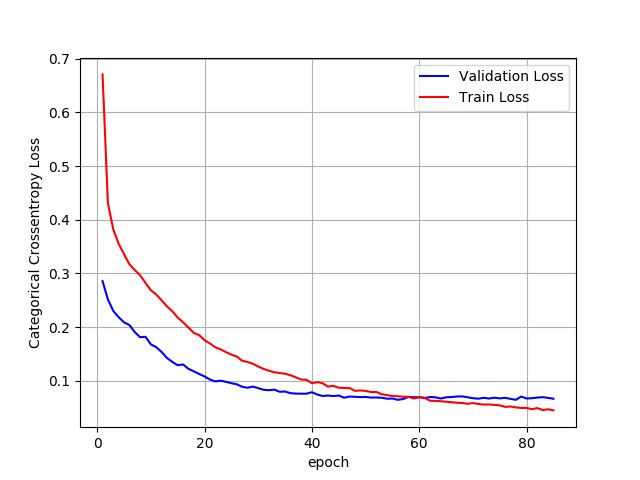

In [38]:
A1M7_score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A1M7_score[0]) 
print('Test accuracy:', A1M7_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = A1M7_history.history['val_loss']
ty = A1M7_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 1.1.7.4 Violin Plots for Hidden Layers in Models Trained </h4>

<IPython.core.display.Javascript object>


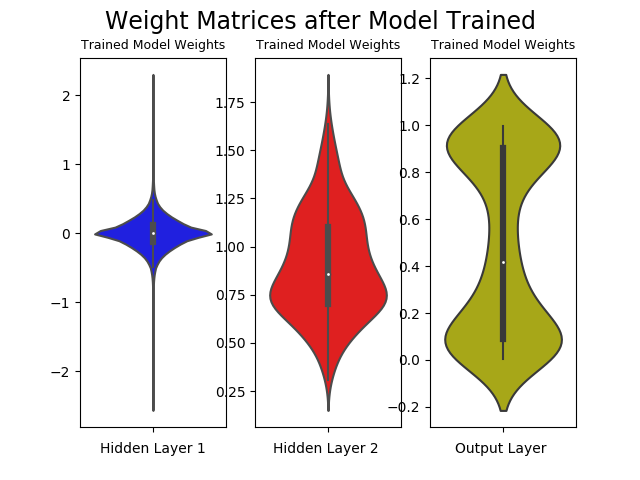

In [39]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Output Layer ')
plt.show()

<h4> 1.1.7.5 Hyper-parameter tuning of Keras Models using Sklearn </h4>

In [40]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,),\
                    kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [41]:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

from datetime import datetime
start = datetime.now()

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=3,n_jobs=-1)
grid_result = grid.fit(X_train, Y_train)

print('Time taken :', datetime.now() - start)

Time taken : 0:25:27.627696


In [42]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982000 using {'activ': 'relu'}
0.978717 (0.001226) with: {'activ': 'sigmoid'}
0.982000 (0.000795) with: {'activ': 'relu'}


***Since we are obtaining the Best Results with ReLU as the activation function, and also because it doesn't have the disadvantages faced by sigmoid or tanh activations, we will only employ ReLU for our remaining models. Also since we know that the Adam Optimizer converges much much faster than the SGD, we only employ Adam for our remaining architectures. However, we will still experiment with the addition of Batch Normalization and Dropout Layers.***

<h2> 1.2 Architecture 2 :- 784-500-125-10 </h2>

<h3> 1.2.1 Model 1 : MLP + Adam Optimizer </h3>

<h4> 1.2.1.1 Constructing the Neural Network </h4>

In [43]:
from keras.layers import Dropout
from keras.initializers import RandomUniform

# for ReLU Layers
# Using He-Uniform Weight Initialization
# h1 =>  σ=√(6/(fan_in) = 0.0874 (minval & maxval)
# h2 =>  σ=√(6/(fan_in) = 0.109 (minval & maxval)

arch2_model1 = Sequential()

arch2_model1.add(Dense(500, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))

arch2_model1.add(Dense(125, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.109, maxval=0.109, seed=None)) )

arch2_model1.add(Dense(output_dim, activation='softmax'))
arch2_model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_24 (Dense)             (None, 125)               62625     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1260      
Total params: 456,385
Trainable params: 456,385
Non-trainable params: 0
_________________________________________________________________


<h4> 1.2.1.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [44]:
arch2_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A2M1_history = arch2_model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 5s 81us/step - loss: 0.2392 - accuracy: 0.9301 - val_loss: 0.1197 - val_accuracy: 0.9639
Epoch 2/85
60000/60000 [==============================] - 5s 76us/step - loss: 0.0853 - accuracy: 0.9742 - val_loss: 0.1072 - val_accuracy: 0.9659
Epoch 3/85
60000/60000 [==============================] - 5s 76us/step - loss: 0.0556 - accuracy: 0.9828 - val_loss: 0.0740 - val_accuracy: 0.9765
Epoch 4/85
60000/60000 [==============================] - 5s 80us/step - loss: 0.0381 - accuracy: 0.9874 - val_loss: 0.0692 - val_accuracy: 0.9781
Epoch 5/85
60000/60000 [==============================] - 5s 77us/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.0715 - val_accuracy: 0.9787
Epoch 6/85
60000/60000 [==============================] - 5s 75us/step - loss: 0.0210 - accuracy: 0.9929 - val_loss: 0.0637 - val_accuracy: 0.9816
Epoch 7/85
60000/60000 [==============================] - 5s 76us/st

<h4> 1.2.1.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.11757605352995124
Test accuracy: 0.9869999885559082


<IPython.core.display.Javascript object>


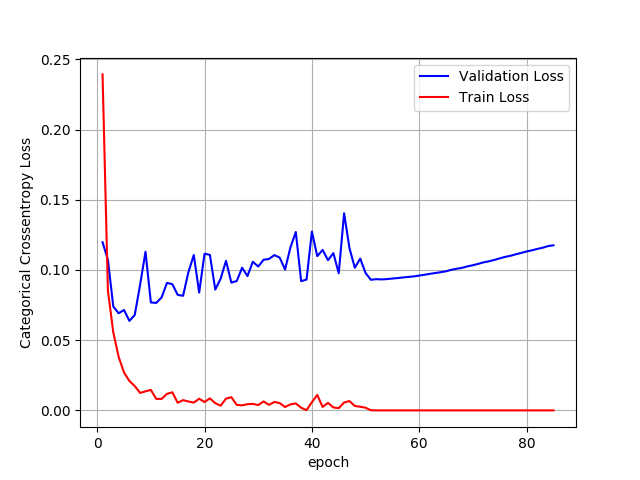

In [45]:
A2M1_score = arch2_model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A2M1_score[0]) 
print('Test accuracy:', A2M1_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A2M1_history.history['val_loss']
ty = A2M1_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 1.2.1.4 Violin Plots for Hidden Layers in Models Trained </h4>

<IPython.core.display.Javascript object>


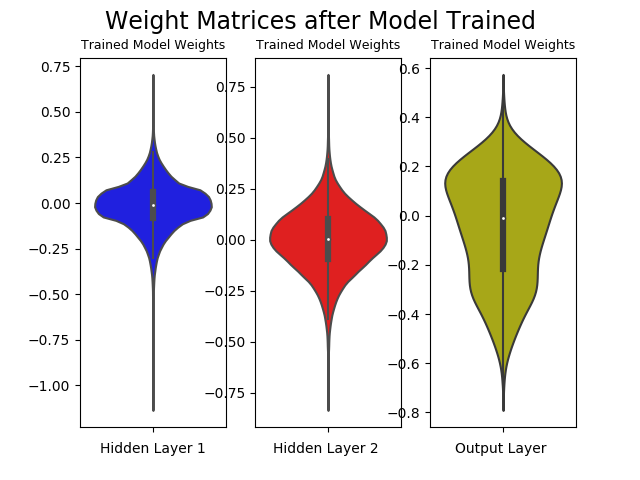

In [46]:
w_after = arch2_model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 1.2.2 Model 2 : MLP + BatchNormalization + Adam Optimizer </h3>

<h4> 1.2.2.1 Constructing the Neural Network </h4>

In [47]:
arch2_model2 = Sequential()

arch2_model2.add(Dense(500, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
arch2_model2.add(BatchNormalization())

arch2_model2.add(Dense(125, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.109, maxval=0.109, seed=None)) )
arch2_model2.add(BatchNormalization())

arch2_model2.add(Dense(output_dim, activation='softmax'))
arch2_model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_5 (Batch (None, 500)               2000      
_________________________________________________________________
dense_27 (Dense)             (None, 125)               62625     
_________________________________________________________________
batch_normalization_6 (Batch (None, 125)               500       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                1260      
Total params: 458,885
Trainable params: 457,635
Non-trainable params: 1,250
_________________________________________________________________


<h4> 1.2.2.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [48]:
arch2_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A2M2_history = arch2_model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 7s 114us/step - loss: 0.1894 - accuracy: 0.9431 - val_loss: 0.0972 - val_accuracy: 0.9708
Epoch 2/85
60000/60000 [==============================] - 6s 103us/step - loss: 0.0696 - accuracy: 0.9789 - val_loss: 0.0827 - val_accuracy: 0.9742
Epoch 3/85
60000/60000 [==============================] - 6s 107us/step - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0721 - val_accuracy: 0.9775
Epoch 4/85
60000/60000 [==============================] - 6s 104us/step - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0729 - val_accuracy: 0.9782
Epoch 5/85
60000/60000 [==============================] - 7s 111us/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0837 - val_accuracy: 0.9759
Epoch 6/85
60000/60000 [==============================] - 6s 104us/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0935 - val_accuracy: 0.9726
Epoch 7/85
60000/60000 [==============================] - 6s 1

<h4> 1.2.2.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.11263822395573155
Test accuracy: 0.982200026512146


<IPython.core.display.Javascript object>


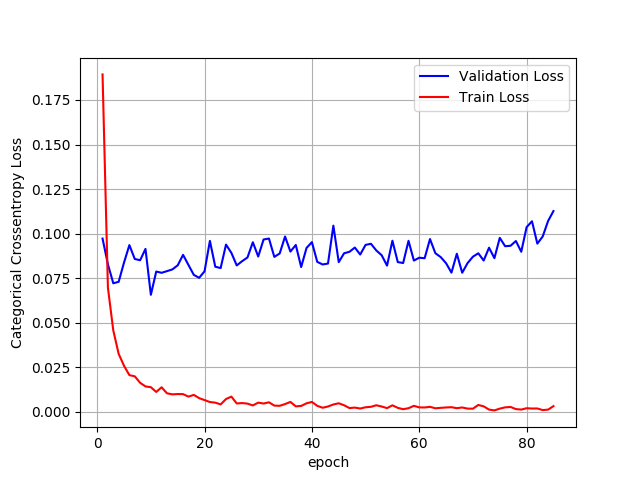

In [49]:
A2M2_score = arch2_model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A2M2_score[0]) 
print('Test accuracy:', A2M2_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A2M2_history.history['val_loss']
ty = A2M2_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 1.2.2.4 Violin Plots for Hidden Layers in Models Trained </h4>

<IPython.core.display.Javascript object>


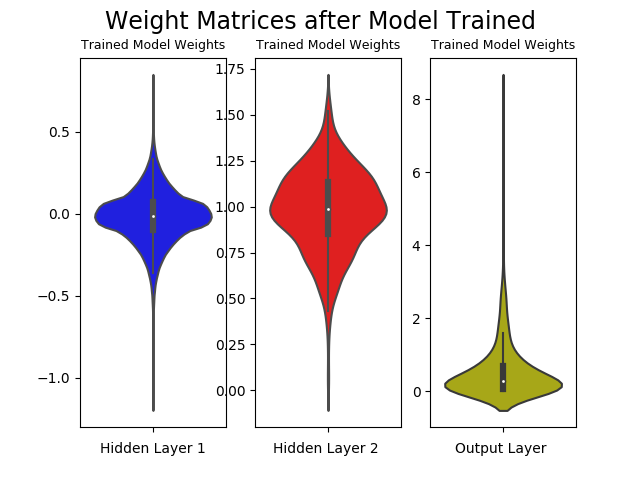

In [50]:
w_after = arch2_model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 1.2.3 Model 3 : MLP + BatchNormalization + Dropout + Adam Optimizer </h3>

<h4> 1.2.3.1 Hyperparameter Tuning for Dropout </h4>

In [51]:
def A2M3_best_hyperparameters(dropout):
    arch2_model3 = Sequential()

    arch2_model3.add(Dense(500, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
    arch2_model3.add(BatchNormalization())
    arch2_model3.add(Dropout(dropout))
    
    arch2_model3.add(Dense(125, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.109, maxval=0.109, seed=None)) )
    arch2_model3.add(BatchNormalization())
    arch2_model3.add(Dropout(dropout))
    
    arch2_model3.add(Dense(output_dim, activation='softmax'))
    
    arch2_model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return arch2_model3

In [52]:
from datetime import datetime
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
start = datetime.now()

dropout = []

for d in range(1,10):
    dropout.append(d/10)

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=A2M3_best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(dropout=dropout)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid_1 = GridSearchCV(estimator=model, param_grid=param_grid,cv=3,n_jobs=-1)
grid_result1 = grid_1.fit(X_train, Y_train)

print('Time taken :', datetime.now() - start)

Time taken : 2:11:58.078499


In [67]:
print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982283 using {'dropout': 0.3}
0.981167 (0.001212) with: {'dropout': 0.1}
0.981367 (0.001259) with: {'dropout': 0.2}
0.982283 (0.001100) with: {'dropout': 0.3}
0.981683 (0.001133) with: {'dropout': 0.4}
0.981367 (0.000781) with: {'dropout': 0.5}
0.981033 (0.000903) with: {'dropout': 0.6}
0.979767 (0.000759) with: {'dropout': 0.7}
0.974950 (0.000980) with: {'dropout': 0.8}
0.958567 (0.001837) with: {'dropout': 0.9}


<h4> 1.2.3.2 Constructing the Neural Network </h4>

In [54]:
arch2_model3 = Sequential()

arch2_model3.add(Dense(500, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
arch2_model3.add(BatchNormalization())
arch2_model3.add(Dropout(0.3))
    
arch2_model3.add(Dense(125, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.109, maxval=0.109, seed=None)) )
arch2_model3.add(BatchNormalization())
arch2_model3.add(Dropout(0.3))
    
arch2_model3.add(Dense(output_dim, activation='softmax'))
arch2_model3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_9 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_5 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 125)               62625     
_________________________________________________________________
batch_normalization_10 (Batc (None, 125)               500       
_________________________________________________________________
dropout_6 (Dropout)          (None, 125)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 10)              

<h4> 1.2.3.3 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [55]:
arch2_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A2M3_history = arch2_model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 8s 134us/step - loss: 0.2904 - accuracy: 0.9118 - val_loss: 0.1116 - val_accuracy: 0.9661
Epoch 2/85
60000/60000 [==============================] - 8s 129us/step - loss: 0.1333 - accuracy: 0.9587 - val_loss: 0.0862 - val_accuracy: 0.9730
Epoch 3/85
60000/60000 [==============================] - 7s 118us/step - loss: 0.1030 - accuracy: 0.9682 - val_loss: 0.0818 - val_accuracy: 0.9727
Epoch 4/85
60000/60000 [==============================] - 7s 124us/step - loss: 0.0850 - accuracy: 0.9732 - val_loss: 0.0730 - val_accuracy: 0.9779
Epoch 5/85
60000/60000 [==============================] - 7s 124us/step - loss: 0.0725 - accuracy: 0.9769 - val_loss: 0.0638 - val_accuracy: 0.9819
Epoch 6/85
60000/60000 [==============================] - 8s 132us/step - loss: 0.0622 - accuracy: 0.9798 - val_loss: 0.0635 - val_accuracy: 0.9810
Epoch 7/85
60000/60000 [==============================] - 8s 1

<h4> 1.2.3.4 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.06704683752219424
Test accuracy: 0.9854999780654907


<IPython.core.display.Javascript object>


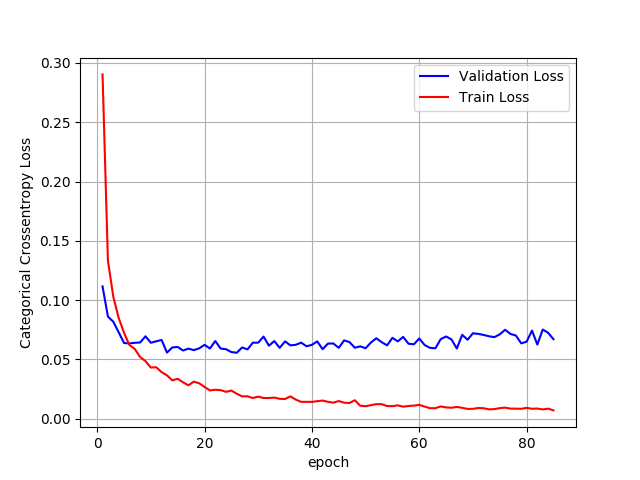

In [56]:
A2M3_score = arch2_model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A2M3_score[0]) 
print('Test accuracy:', A2M3_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A2M3_history.history['val_loss']
ty = A2M3_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 1.2.3.5 Violin Plots for Hidden Layers in Models Trained </h4>

<IPython.core.display.Javascript object>


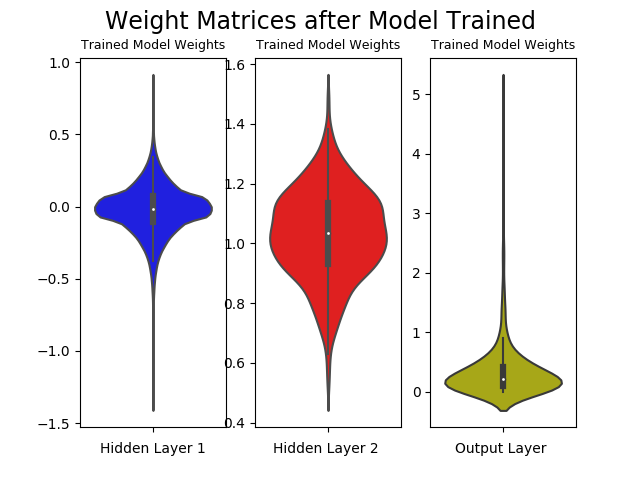

In [57]:
w_after = arch2_model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Output Layer ')
plt.show()

<h2> 1.3 Architecture 3 :- 784-256-64-10 </h2>

<h3> 1.3.1 Model 1 : MLP + Adam Optimizer </h3>

<h4> 1.3.1.1 Constructing the Neural Network </h4>

In [58]:
arch3_model1 = Sequential()

arch3_model1.add(Dense(256, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))

arch3_model1.add(Dense(64, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )

arch3_model1.add(Dense(output_dim, activation='softmax'))
arch3_model1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_36 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_37 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


<h4> 1.3.1.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [59]:
arch3_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A3M1_history = arch3_model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 3s 53us/step - loss: 0.2862 - accuracy: 0.9180 - val_loss: 0.1263 - val_accuracy: 0.9638
Epoch 2/85
60000/60000 [==============================] - 3s 47us/step - loss: 0.1051 - accuracy: 0.9683 - val_loss: 0.0927 - val_accuracy: 0.9719
Epoch 3/85
60000/60000 [==============================] - 3s 48us/step - loss: 0.0686 - accuracy: 0.9789 - val_loss: 0.0808 - val_accuracy: 0.9752
Epoch 4/85
60000/60000 [==============================] - 3s 46us/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 0.0767 - val_accuracy: 0.9773
Epoch 5/85
60000/60000 [==============================] - 3s 45us/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0679 - val_accuracy: 0.9790
Epoch 6/85
60000/60000 [==============================] - 3s 44us/step - loss: 0.0284 - accuracy: 0.9912 - val_loss: 0.0751 - val_accuracy: 0.9771
Epoch 7/85
60000/60000 [==============================] - 3s 46us/st

<h4> 1.3.1.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.1539675504027916
Test accuracy: 0.9821000099182129


<IPython.core.display.Javascript object>


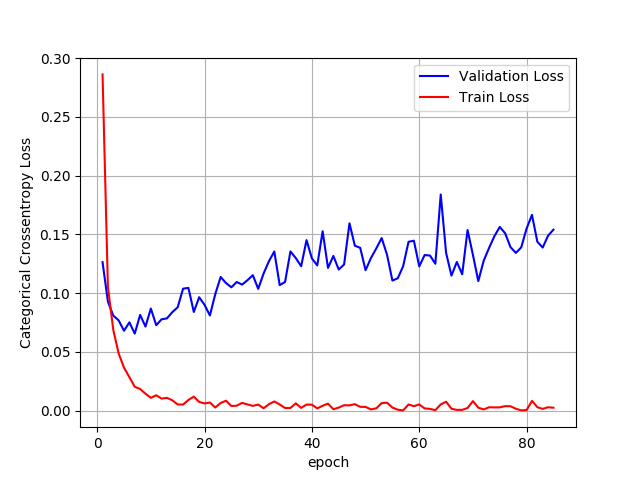

In [60]:
A3M1_score = arch3_model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A3M1_score[0]) 
print('Test accuracy:', A3M1_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A3M1_history.history['val_loss']
ty = A3M1_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 1.3.1.4 Violin Plots for Hidden Layers in the Models Trained </h4>

/Users/dhruvnarayanan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


<IPython.core.display.Javascript object>


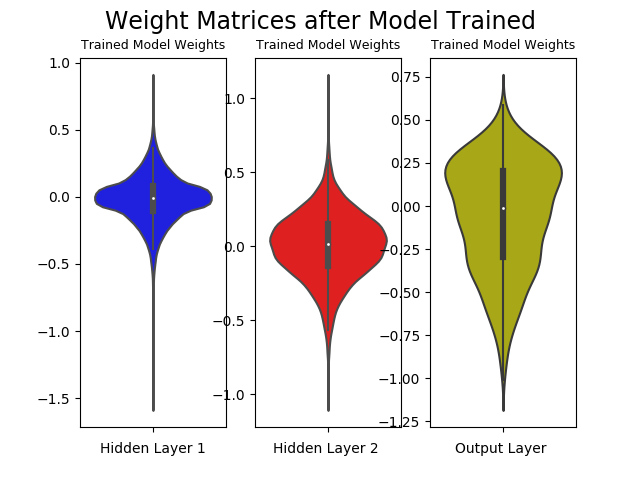

In [61]:
w_after = arch3_model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 1.3.2 Model 2 : MLP + BatchNormalization + Adam Optimizer </h3>

<h4> 1.3.2.1 Constructing the Neural Network </h4>

In [62]:
arch3_model2 = Sequential()

arch3_model2.add(Dense(256, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
arch3_model2.add(BatchNormalization())

arch3_model2.add(Dense(64, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )
arch3_model2.add(BatchNormalization())

arch3_model2.add(Dense(output_dim, activation='softmax'))
arch3_model2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_11 (Batc (None, 256)               1024      
_________________________________________________________________
dense_39 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)                256       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                650       
Total params: 219,338
Trainable params: 218,698
Non-trainable params: 640
_________________________________________________________________


<h4> 1.3.2.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [63]:
arch3_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A3M2_history = arch3_model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 4s 70us/step - loss: 0.2299 - accuracy: 0.9331 - val_loss: 0.1170 - val_accuracy: 0.9656
Epoch 2/85
60000/60000 [==============================] - 3s 58us/step - loss: 0.0853 - accuracy: 0.9751 - val_loss: 0.0903 - val_accuracy: 0.9717
Epoch 3/85
60000/60000 [==============================] - 4s 60us/step - loss: 0.0574 - accuracy: 0.9821 - val_loss: 0.0897 - val_accuracy: 0.9725
Epoch 4/85
60000/60000 [==============================] - 4s 59us/step - loss: 0.0414 - accuracy: 0.9876 - val_loss: 0.0867 - val_accuracy: 0.9735
Epoch 5/85
60000/60000 [==============================] - 3s 58us/step - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0809 - val_accuracy: 0.9772
Epoch 6/85
60000/60000 [==============================] - 3s 57us/step - loss: 0.0273 - accuracy: 0.9908 - val_loss: 0.0871 - val_accuracy: 0.9739
Epoch 7/85
60000/60000 [==============================] - 4s 62us/st

<h4> 1.3.2.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.1048331060788921
Test accuracy: 0.9818999767303467


<IPython.core.display.Javascript object>


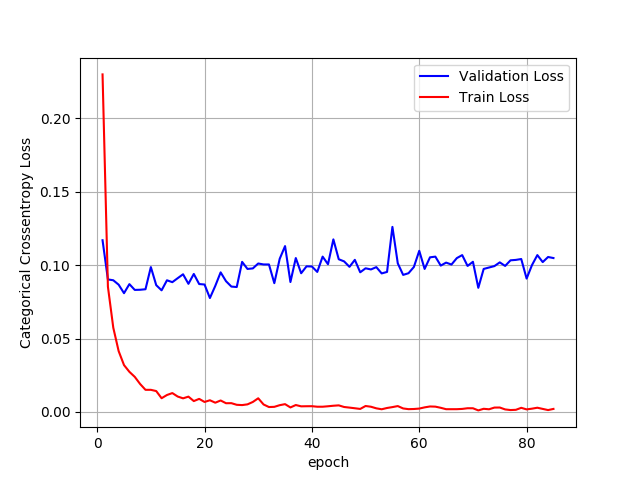

In [65]:
import warnings
warnings.filterwarnings("ignore")

A3M2_score = arch3_model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A3M2_score[0]) 
print('Test accuracy:', A3M2_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A3M2_history.history['val_loss']
ty = A3M2_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 1.3.2.4 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


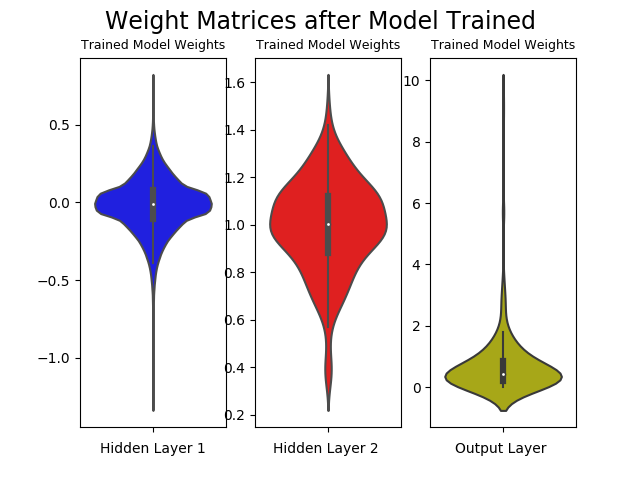

In [66]:
warnings.filterwarnings("ignore")

w_after = arch3_model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 1.3.3 Model 3 : MLP + BatchNormalization + Dropout + Adam Optimizer </h3>

<h4> 1.3.3.1 Hyperparameter Tuning for Dropout </h4>

In [68]:
def A3M3_best_hyperparameters(dropout):
    arch3_model3 = Sequential()

    arch3_model3.add(Dense(256, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
    arch3_model3.add(BatchNormalization())
    arch3_model3.add(Dropout(dropout))
    
    arch3_model3.add(Dense(64, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )
    arch3_model3.add(BatchNormalization())
    arch3_model3.add(Dropout(dropout))
    
    arch3_model3.add(Dense(output_dim, activation='softmax'))
    
    arch3_model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return arch3_model3

In [69]:
start = datetime.now()

dropout = []

for d in range(1,10):
    dropout.append(d/10)

model = KerasClassifier(build_fn=A3M3_best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(dropout=dropout)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid_2 = GridSearchCV(estimator=model, param_grid=param_grid,cv=3,n_jobs=-1)
grid_result2 = grid_2.fit(X_train, Y_train)

print('Time taken :', datetime.now() - start)

Time taken : 1:04:10.298202


In [70]:
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.980750 using {'dropout': 0.3}
0.979300 (0.001089) with: {'dropout': 0.1}
0.980217 (0.001474) with: {'dropout': 0.2}
0.980750 (0.000748) with: {'dropout': 0.3}
0.979617 (0.000980) with: {'dropout': 0.4}
0.978850 (0.000286) with: {'dropout': 0.5}
0.976450 (0.000942) with: {'dropout': 0.6}
0.973783 (0.001014) with: {'dropout': 0.7}
0.963700 (0.000935) with: {'dropout': 0.8}
0.936917 (0.002500) with: {'dropout': 0.9}


<h4> 1.3.3.2 Constructing the Neural Network </h4>

In [13]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

arch3_model3 = Sequential()

arch3_model3.add(Dense(256, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
arch3_model3.add(BatchNormalization())
arch3_model3.add(Dropout(0.3))
    
arch3_model3.add(Dense(64, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )
arch3_model3.add(BatchNormalization())
arch3_model3.add(Dropout(0.3))

arch3_model3.add(Dense(output_dim, activation='softmax'))
arch3_model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

<h4> 1.3.3.3 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [14]:
arch3_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A3M3_history = arch3_model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 5s 90us/step - loss: 0.3820 - accuracy: 0.8863 - val_loss: 0.1421 - val_accuracy: 0.9591
Epoch 2/85
60000/60000 [==============================] - 5s 77us/step - loss: 0.1779 - accuracy: 0.9473 - val_loss: 0.1111 - val_accuracy: 0.9659
Epoch 3/85
60000/60000 [==============================] - 5s 75us/step - loss: 0.1382 - accuracy: 0.9586 - val_loss: 0.0979 - val_accuracy: 0.9685
Epoch 4/85
60000/60000 [==============================] - 4s 73us/step - loss: 0.1159 - accuracy: 0.9651 - val_loss: 0.0820 - val_accuracy: 0.9752
Epoch 5/85
60000/60000 [==============================] - 5s 77us/step - loss: 0.0986 - accuracy: 0.9695 - val_loss: 0.0783 - val_accuracy: 0.9760
Epoch 6/85
60000/60000 [==============================] - 4s 74us/step - loss: 0.0914 - accuracy: 0.9717 - val_loss: 0.0798 - val_accuracy: 0.9748
Epoch 7/85
60000/60000 [==============================] - 4s 72us/st

<h4> 1.3.3.4 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.06828610219557331
Test accuracy: 0.9850999712944031


<IPython.core.display.Javascript object>


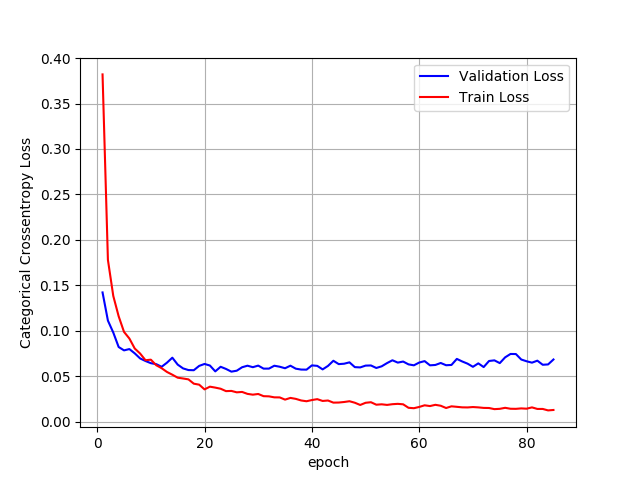

In [15]:
import warnings
warnings.filterwarnings("ignore")

A3M3_score = arch3_model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A3M3_score[0]) 
print('Test accuracy:', A3M3_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A3M3_history.history['val_loss']
ty = A3M3_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 1.3.3.5 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


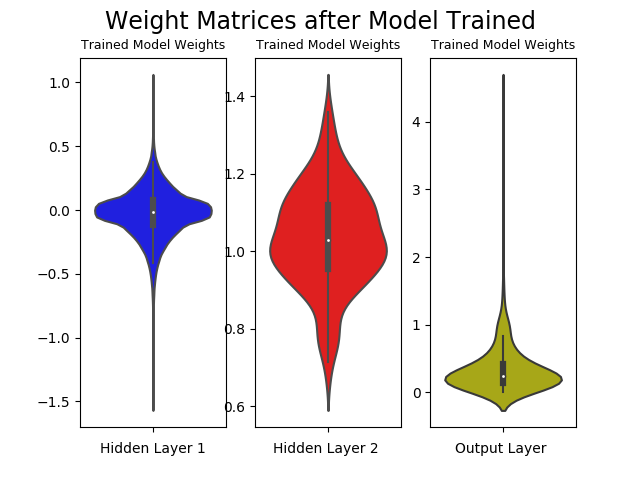

In [16]:
warnings.filterwarnings("ignore")

w_after = arch3_model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 3, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 9) 
plt.xlabel('Output Layer ')
plt.show()

# 2. Number of Hidden Layers in the Neural Network = 3

<h2> 2.1 Architecture 4 :- 784-512-256-128-10 </h2>

<h3> 2.1.1 Model 1 : MLP + Adam Optimizer </h3>

<h4> 2.1.1.1 Constructing the Neural Network </h4>

In [47]:
arch4_model1 = Sequential()

arch4_model1.add(Dense(512, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))

arch4_model1.add(Dense(256, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.108, maxval=0.108, seed=None)) )

arch4_model1.add(Dense(128, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )

arch4_model1.add(Dense(output_dim, activation='softmax'))
arch4_model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


<h4> 2.1.1.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [48]:
arch4_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A4M1_history = arch4_model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 6s 107us/step - loss: 0.2245 - accuracy: 0.9320 - val_loss: 0.0950 - val_accuracy: 0.9716
Epoch 2/85
60000/60000 [==============================] - 7s 109us/step - loss: 0.0822 - accuracy: 0.9743 - val_loss: 0.0905 - val_accuracy: 0.9708
Epoch 3/85
60000/60000 [==============================] - 6s 104us/step - loss: 0.0531 - accuracy: 0.9833 - val_loss: 0.0704 - val_accuracy: 0.9783
Epoch 4/85
60000/60000 [==============================] - 6s 106us/step - loss: 0.0383 - accuracy: 0.9875 - val_loss: 0.0807 - val_accuracy: 0.9771
Epoch 5/85
60000/60000 [==============================] - 6s 108us/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.0726 - val_accuracy: 0.9786
Epoch 6/85
60000/60000 [==============================] - 7s 110us/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0789 - val_accuracy: 0.9770
Epoch 7/85
60000/60000 [==============================] - 7s 1

<h4> 2.1.1.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.13447041057337014
Test accuracy: 0.9851999878883362


<IPython.core.display.Javascript object>


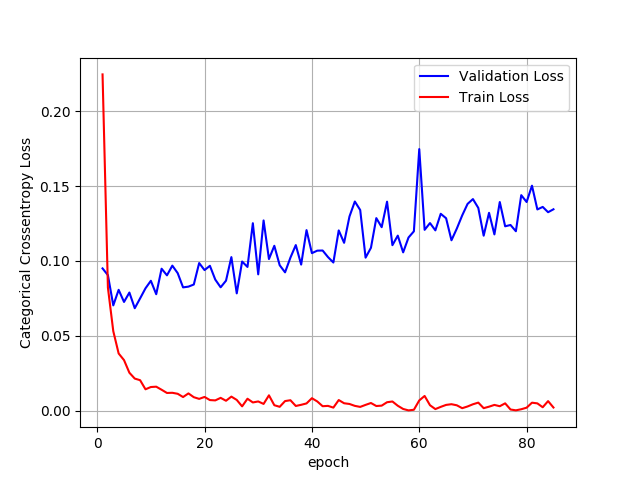

In [49]:
A4M1_score = arch4_model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A4M1_score[0]) 
print('Test accuracy:', A4M1_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the parameter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A4M1_history.history['val_loss']
ty = A4M1_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 2.1.1.4 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


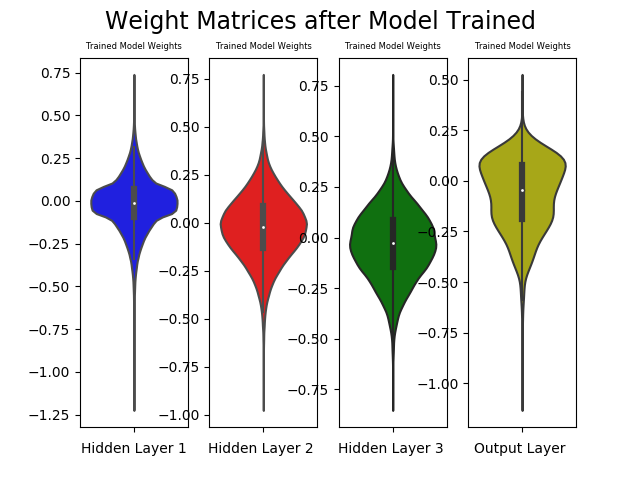

In [50]:
warnings.filterwarnings("ignore")

w_after = arch4_model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 4, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1,4, 3)
ax = sns.violinplot(y=h3_w, color='g')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 2.1.2 Model 2 : MLP + BatchNormalization + Adam Optimizer </h3>

<h4> 2.1.2.1 Constructing the Neural Network </h4>

In [54]:
arch4_model2 = Sequential()

arch4_model2.add(Dense(512, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
arch4_model2.add(BatchNormalization())

arch4_model2.add(Dense(256, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.108, maxval=0.108, seed=None)) )
arch4_model2.add(BatchNormalization())

arch4_model2.add(Dense(128, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )
arch4_model2.add(BatchNormalization())

arch4_model2.add(Dense(output_dim, activation='softmax'))
arch4_model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_18 (Batc (None, 512)               2048      
_________________________________________________________________
dense_37 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_19 (Batc (None, 256)               1024      
_________________________________________________________________
dense_38 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_20 (Batc (None, 128)               512       
_________________________________________________________________
dense_39 (Dense)             (None, 10)              

<h4> 2.1.2.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [55]:
arch4_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A4M2_history = arch4_model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 10s 171us/step - loss: 0.1944 - accuracy: 0.9409 - val_loss: 0.0935 - val_accuracy: 0.9706
Epoch 2/85
60000/60000 [==============================] - 9s 149us/step - loss: 0.0717 - accuracy: 0.9783 - val_loss: 0.1014 - val_accuracy: 0.9688
Epoch 3/85
60000/60000 [==============================] - 9s 148us/step - loss: 0.0483 - accuracy: 0.9848 - val_loss: 0.0997 - val_accuracy: 0.9708
Epoch 4/85
60000/60000 [==============================] - 9s 154us/step - loss: 0.0388 - accuracy: 0.9876 - val_loss: 0.0756 - val_accuracy: 0.9774
Epoch 5/85
60000/60000 [==============================] - 9s 150us/step - loss: 0.0291 - accuracy: 0.9901 - val_loss: 0.0772 - val_accuracy: 0.9777
Epoch 6/85
60000/60000 [==============================] - 9s 156us/step - loss: 0.0260 - accuracy: 0.9912 - val_loss: 0.0783 - val_accuracy: 0.9780
Epoch 7/85
60000/60000 [==============================] - 10s

<h4> 2.1.2.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.08532992944723572
Test accuracy: 0.9851999878883362


<IPython.core.display.Javascript object>


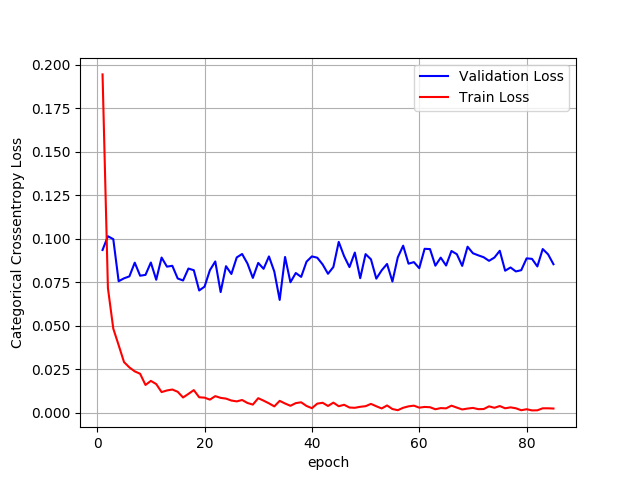

In [56]:
warnings.filterwarnings("ignore")

A4M2_score = arch4_model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A4M2_score[0]) 
print('Test accuracy:', A4M2_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A4M2_history.history['val_loss']
ty = A4M2_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 2.1.2.4 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


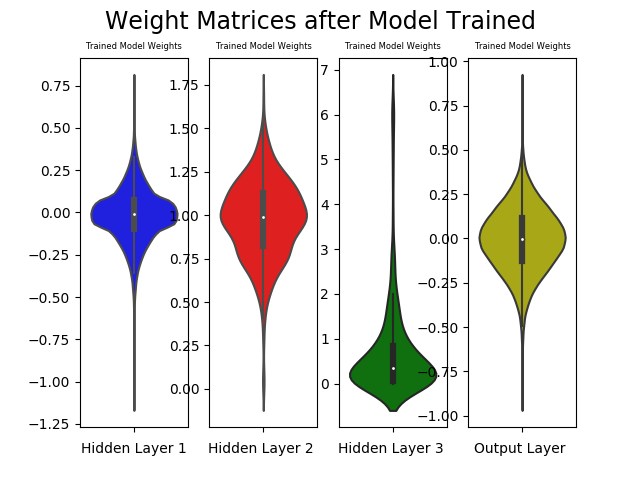

In [57]:
w_after = arch4_model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 4, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1,4, 3)
ax = sns.violinplot(y=h3_w, color='g')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 2.1.3 Model 3 : MLP + BatchNormalization + Dropout + Adam Optimizer </h3>

<h4> 2.1.3.1 Hyperparameter Tuning for Dropout </h4>

In [25]:
def A4M3_best_hyperparameters(dropout):
    arch4_model3 = Sequential()

    arch4_model3.add(Dense(512, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
    arch4_model3.add(BatchNormalization())
    arch4_model3.add(Dropout(dropout))
    
    arch4_model3.add(Dense(256, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.108, maxval=0.108, seed=None)) )
    arch4_model3.add(BatchNormalization())
    arch4_model3.add(Dropout(dropout))

    arch4_model3.add(Dense(128, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )
    arch4_model3.add(BatchNormalization())
    arch4_model3.add(Dropout(dropout))

    arch4_model3.add(Dense(output_dim, activation='softmax'))
    
    arch4_model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return arch4_model3

In [26]:
from datetime import datetime
start = datetime.now()

dropout = []

for d in range(1,10):
    dropout.append(d/10)

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=A4M3_best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(dropout=dropout)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid_3 = GridSearchCV(estimator=model, param_grid=param_grid,cv=3,n_jobs=-1)
grid_result3 = grid_3.fit(X_train, Y_train)

print('Time taken :', datetime.now() - start)

Time taken : 2:38:58.557040


In [27]:
print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982333 using {'dropout': 0.3}
0.981300 (0.001297) with: {'dropout': 0.1}
0.981617 (0.000595) with: {'dropout': 0.2}
0.982333 (0.001351) with: {'dropout': 0.3}
0.982150 (0.001227) with: {'dropout': 0.4}
0.982333 (0.001342) with: {'dropout': 0.5}
0.981200 (0.000531) with: {'dropout': 0.6}
0.979550 (0.000726) with: {'dropout': 0.7}
0.974850 (0.001035) with: {'dropout': 0.8}
0.952950 (0.001168) with: {'dropout': 0.9}


<h4> 2.1.3.2 Constructing the Neural Network </h4>

In [58]:
arch4_model3 = Sequential()

arch4_model3.add(Dense(512, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
arch4_model3.add(BatchNormalization())
arch4_model3.add(Dropout(0.3))
    
arch4_model3.add(Dense(256, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.108, maxval=0.108, seed=None)) )
arch4_model3.add(BatchNormalization())
arch4_model3.add(Dropout(0.3))

arch4_model3.add(Dense(128, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )
arch4_model3.add(BatchNormalization())
arch4_model3.add(Dropout(0.3))

arch4_model3.add(Dense(output_dim, activation='softmax'))
arch4_model3.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_22 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)             

<h4> 2.1.3.3 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [59]:
arch4_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A4M3_history = arch4_model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 10s 167us/step - loss: 0.3439 - accuracy: 0.8951 - val_loss: 0.1178 - val_accuracy: 0.9654
Epoch 2/85
60000/60000 [==============================] - 9s 153us/step - loss: 0.1560 - accuracy: 0.9519 - val_loss: 0.0893 - val_accuracy: 0.9721
Epoch 3/85
60000/60000 [==============================] - 9s 156us/step - loss: 0.1142 - accuracy: 0.9653 - val_loss: 0.0842 - val_accuracy: 0.9740
Epoch 4/85
60000/60000 [==============================] - 9s 147us/step - loss: 0.0978 - accuracy: 0.9699 - val_loss: 0.0754 - val_accuracy: 0.9770
Epoch 5/85
60000/60000 [==============================] - 9s 154us/step - loss: 0.0830 - accuracy: 0.9740 - val_loss: 0.0716 - val_accuracy: 0.9780
Epoch 6/85
60000/60000 [==============================] - 9s 150us/step - loss: 0.0741 - accuracy: 0.9766 - val_loss: 0.0695 - val_accuracy: 0.9794
Epoch 7/85
60000/60000 [==============================] - 9s 

<h4> 2.1.3.4 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.06769079408217712
Test accuracy: 0.9843999743461609


<IPython.core.display.Javascript object>


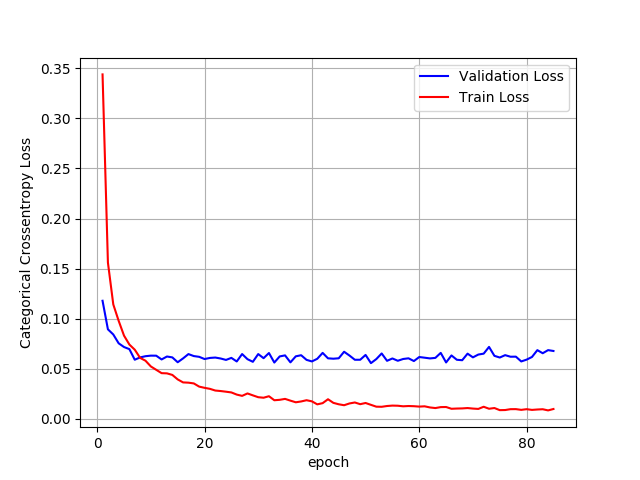

In [60]:
warnings.filterwarnings("ignore")

A4M3_score = arch4_model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A4M3_score[0]) 
print('Test accuracy:', A4M3_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A4M3_history.history['val_loss']
ty = A4M3_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 2.1.3.5 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


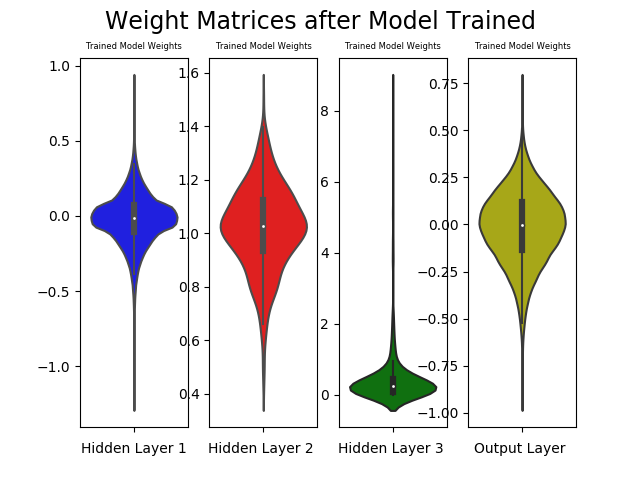

In [61]:
w_after = arch4_model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 4, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1,4, 3)
ax = sns.violinplot(y=h3_w, color='g')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Output Layer ')
plt.show()

<h2> 2.2 Architecture 5 :- 784-500-250-125-10 </h2>

<h3> 2.2.1 Model 1 : MLP + Adam Optimizer </h3>

<h4> 2.2.1.1 Constructing the Neural Network </h4>

In [32]:
arch5_model1 = Sequential()

arch5_model1.add(Dense(500, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))

arch5_model1.add(Dense(250, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.109, maxval=0.109, seed=None)) )

arch5_model1.add(Dense(125, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.155, maxval=0.155, seed=None)) )

arch5_model1.add(Dense(output_dim, activation='softmax'))
arch5_model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_21 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_22 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1260      
Total params: 550,385
Trainable params: 550,385
Non-trainable params: 0
_________________________________________________________________


<h4> 2.2.1.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [33]:
arch5_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A5M1_history = arch5_model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 6s 105us/step - loss: 0.2251 - accuracy: 0.9333 - val_loss: 0.1030 - val_accuracy: 0.9681
Epoch 2/85
60000/60000 [==============================] - 6s 108us/step - loss: 0.0824 - accuracy: 0.9742 - val_loss: 0.0824 - val_accuracy: 0.9759
Epoch 3/85
60000/60000 [==============================] - 6s 105us/step - loss: 0.0538 - accuracy: 0.9829 - val_loss: 0.0931 - val_accuracy: 0.9700
Epoch 4/85
60000/60000 [==============================] - 6s 108us/step - loss: 0.0399 - accuracy: 0.9869 - val_loss: 0.0848 - val_accuracy: 0.9741
Epoch 5/85
60000/60000 [==============================] - 6s 103us/step - loss: 0.0319 - accuracy: 0.9895 - val_loss: 0.0725 - val_accuracy: 0.9792
Epoch 6/85
60000/60000 [==============================] - 6s 104us/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0718 - val_accuracy: 0.9794
Epoch 7/85
60000/60000 [==============================] - 6s 1

<h4> 2.2.1.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.1481512006560134
Test accuracy: 0.98580002784729


<IPython.core.display.Javascript object>


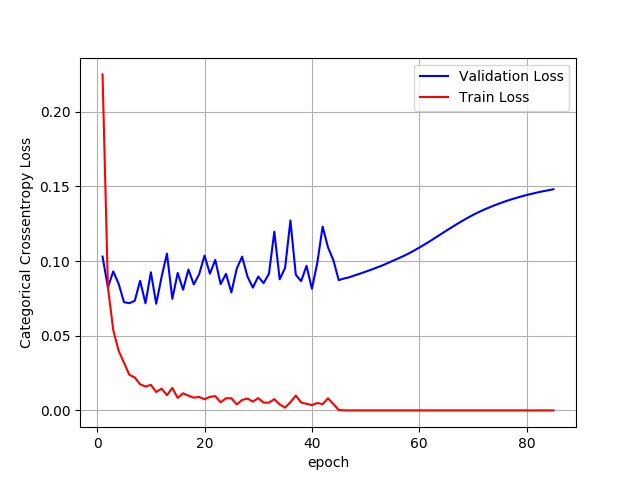

In [34]:
warnings.filterwarnings("ignore")

A5M1_score = arch5_model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A5M1_score[0]) 
print('Test accuracy:', A5M1_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A5M1_history.history['val_loss']
ty = A5M1_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 2.2.1.4 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


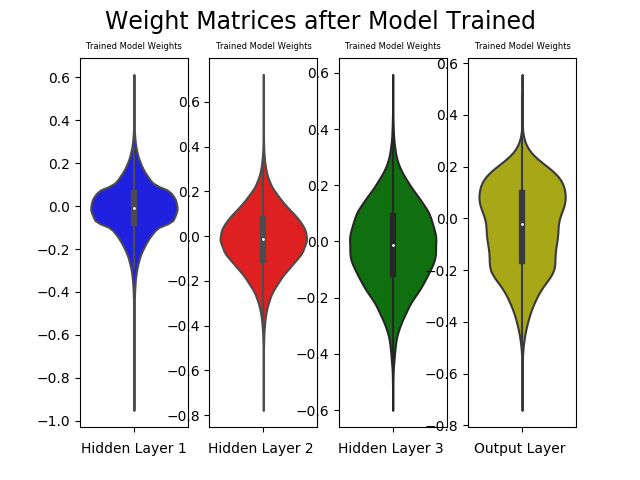

In [46]:
w_after = arch5_model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 4, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1,4, 3)
ax = sns.violinplot(y=h3_w, color='g')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 2.2.2 Model 2 : MLP + BatchNormalization + Adam Optimizer </h3>

<h4> 2.2.2.1 Constructing the Neural Network </h4>

In [62]:
arch5_model2 = Sequential()

arch5_model2.add(Dense(500, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
arch5_model2.add(BatchNormalization())

arch5_model2.add(Dense(250, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.109, maxval=0.109, seed=None)) )
arch5_model2.add(BatchNormalization())

arch5_model2.add(Dense(125, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.155, maxval=0.155, seed=None)) )
arch5_model2.add(BatchNormalization())

arch5_model2.add(Dense(output_dim, activation='softmax'))
arch5_model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 500)               392500    
_________________________________________________________________
batch_normalization_24 (Batc (None, 500)               2000      
_________________________________________________________________
dense_45 (Dense)             (None, 250)               125250    
_________________________________________________________________
batch_normalization_25 (Batc (None, 250)               1000      
_________________________________________________________________
dense_46 (Dense)             (None, 125)               31375     
_________________________________________________________________
batch_normalization_26 (Batc (None, 125)               500       
_________________________________________________________________
dense_47 (Dense)             (None, 10)              

<h4> 2.2.2.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [63]:
arch5_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A5M2_history = arch5_model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 10s 159us/step - loss: 0.1936 - accuracy: 0.9420 - val_loss: 0.0958 - val_accuracy: 0.9710
Epoch 2/85
60000/60000 [==============================] - 9s 151us/step - loss: 0.0732 - accuracy: 0.9769 - val_loss: 0.0775 - val_accuracy: 0.9762
Epoch 3/85
60000/60000 [==============================] - 9s 154us/step - loss: 0.0470 - accuracy: 0.9852 - val_loss: 0.0789 - val_accuracy: 0.9755
Epoch 4/85
60000/60000 [==============================] - 9s 151us/step - loss: 0.0394 - accuracy: 0.9874 - val_loss: 0.0857 - val_accuracy: 0.9760
Epoch 5/85
60000/60000 [==============================] - 9s 151us/step - loss: 0.0313 - accuracy: 0.9896 - val_loss: 0.0746 - val_accuracy: 0.9806
Epoch 6/85
60000/60000 [==============================] - 9s 158us/step - loss: 0.0242 - accuracy: 0.9917 - val_loss: 0.0706 - val_accuracy: 0.9777
Epoch 7/85
60000/60000 [==============================] - 9s 

<h4> 2.2.2.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.09802400289352353
Test accuracy: 0.983299970626831


<IPython.core.display.Javascript object>


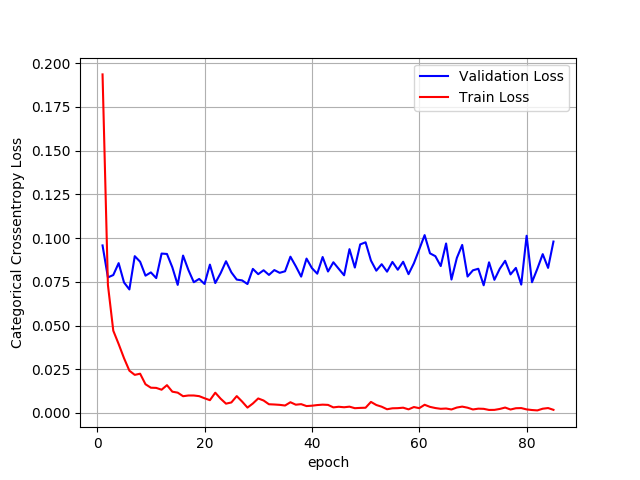

In [64]:
warnings.filterwarnings("ignore")

A5M2_score = arch5_model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A5M2_score[0]) 
print('Test accuracy:', A5M2_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A5M2_history.history['val_loss']
ty = A5M2_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 2.2.2.4 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


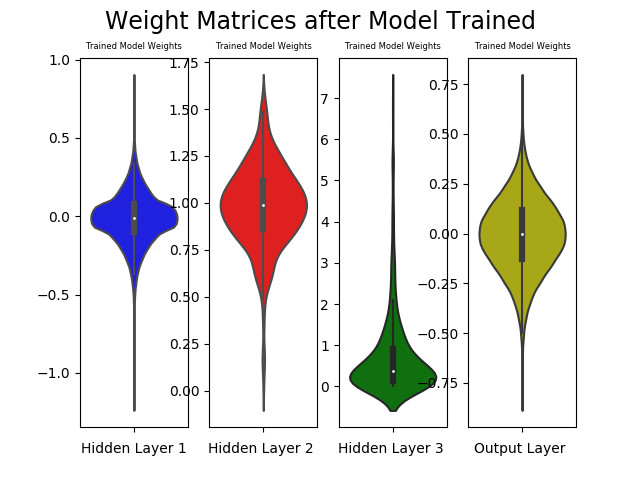

In [65]:
w_after = arch5_model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 4, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1,4, 3)
ax = sns.violinplot(y=h3_w, color='g')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Output Layer ')
plt.show()

<h3> 2.2.3 Model 3 : MLP + BatchNormalization + Dropout + Adam Optimizer </h3>

<h4> 2.2.3.1 Hyperparameter Tuning for Dropout </h4>

In [15]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

def A5M3_best_hyperparameters(dropout):
    arch5_model3 = Sequential()

    arch5_model3.add(Dense(500, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
    arch5_model3.add(BatchNormalization())
    arch5_model3.add(Dropout(dropout))
    
    arch5_model3.add(Dense(250, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.109, maxval=0.109, seed=None)) )
    arch5_model3.add(BatchNormalization())
    arch5_model3.add(Dropout(dropout))

    arch5_model3.add(Dense(125, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.155, maxval=0.155, seed=None)) )
    arch5_model3.add(BatchNormalization())
    arch5_model3.add(Dropout(dropout))

    arch5_model3.add(Dense(output_dim, activation='softmax'))
    
    arch5_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return arch5_model3  

In [18]:
from datetime import datetime
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

start = datetime.now()

dropout = []

for d in range(1,10):
    dropout.append(d/10)

model = KerasClassifier(build_fn=A5M3_best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(dropout=dropout)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid_4 = GridSearchCV(estimator=model, param_grid=param_grid,cv=3,n_jobs=-1)
grid_result4 = grid_4.fit(X_train, Y_train)

print('Time taken :', datetime.now() - start)

Time taken : 2:30:24.596214


In [19]:
print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982750 using {'dropout': 0.4}
0.981600 (0.001524) with: {'dropout': 0.1}
0.981267 (0.000327) with: {'dropout': 0.2}
0.981650 (0.001205) with: {'dropout': 0.3}
0.982750 (0.001003) with: {'dropout': 0.4}
0.982117 (0.001073) with: {'dropout': 0.5}
0.981517 (0.001129) with: {'dropout': 0.6}
0.979683 (0.000710) with: {'dropout': 0.7}
0.973867 (0.001234) with: {'dropout': 0.8}
0.950283 (0.001695) with: {'dropout': 0.9}


<h4> 2.2.3.2 Constructing the Neural Network </h4>

In [20]:
arch5_model3 = Sequential()

arch5_model3.add(Dense(500, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
arch5_model3.add(BatchNormalization())
arch5_model3.add(Dropout(0.4))
    
arch5_model3.add(Dense(250, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.109, maxval=0.109, seed=None)) )
arch5_model3.add(BatchNormalization())
arch5_model3.add(Dropout(0.4))

arch5_model3.add(Dense(125, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.155, maxval=0.155, seed=None)) )
arch5_model3.add(BatchNormalization())
arch5_model3.add(Dropout(0.4))

arch5_model3.add(Dense(output_dim, activation='softmax'))
arch5_model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               392500    
_________________________________________________________________
batch_normalization_4 (Batch (None, 500)               2000      
_________________________________________________________________
dropout_4 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 250)               125250    
_________________________________________________________________
batch_normalization_5 (Batch (None, 250)               1000      
_________________________________________________________________
dropout_5 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 125)              

<h4> 2.2.3.3 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [21]:
arch5_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A5M3_history = arch5_model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 12s 204us/step - loss: 0.4395 - accuracy: 0.8650 - val_loss: 0.1389 - val_accuracy: 0.9555
Epoch 2/85
60000/60000 [==============================] - 8s 141us/step - loss: 0.1951 - accuracy: 0.9414 - val_loss: 0.1036 - val_accuracy: 0.9692
Epoch 3/85
60000/60000 [==============================] - 8s 136us/step - loss: 0.1494 - accuracy: 0.9547 - val_loss: 0.0874 - val_accuracy: 0.9732
Epoch 4/85
60000/60000 [==============================] - 10s 168us/step - loss: 0.1248 - accuracy: 0.9628 - val_loss: 0.0836 - val_accuracy: 0.9759
Epoch 5/85
60000/60000 [==============================] - 10s 173us/step - loss: 0.1103 - accuracy: 0.9671 - val_loss: 0.0748 - val_accuracy: 0.9765
Epoch 6/85
60000/60000 [==============================] - 10s 167us/step - loss: 0.1030 - accuracy: 0.9687 - val_loss: 0.0725 - val_accuracy: 0.9776
Epoch 7/85
60000/60000 [==============================] - 

<h4> 2.2.3.4 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.06687827669550607
Test accuracy: 0.9860000014305115


<IPython.core.display.Javascript object>


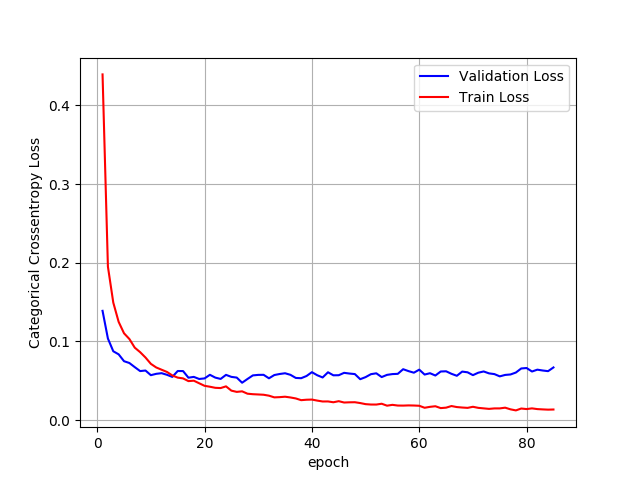

In [22]:
import warnings
warnings.filterwarnings("ignore")

A5M3_score = arch5_model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A5M3_score[0]) 
print('Test accuracy:', A5M3_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A5M3_history.history['val_loss']
ty = A5M3_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 2.2.3.5 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


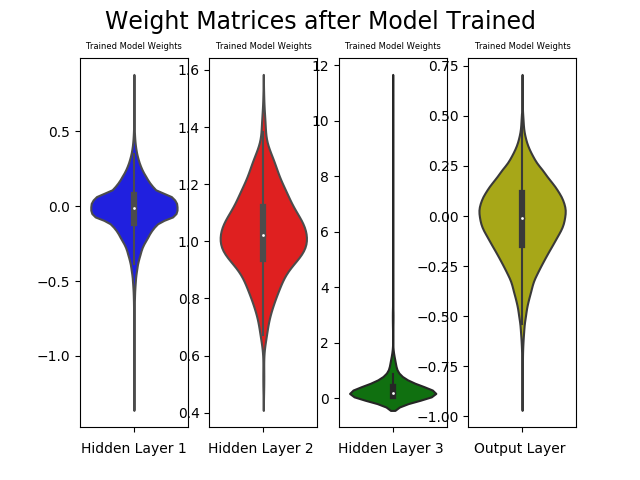

In [23]:
w_after = arch5_model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 4, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1,4, 3)
ax = sns.violinplot(y=h3_w, color='g')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 6) 
plt.xlabel('Output Layer ')
plt.show()

# 3. Number of Hidden Layers in the Neural Network = 5

<h2> 3.1 Architecture 6 :- 784-512-256-128-64-32-10 </h2>

<h3> 3.1.1 Model 1 : MLP + Adam Optimizer </h3>

<h4> 3.1.1.1 Constructing the Neural Network </h4>

In [25]:
arch6_model1 = Sequential()

arch6_model1.add(Dense(512, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))

arch6_model1.add(Dense(256, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.108, maxval=0.108, seed=None)) )

arch6_model1.add(Dense(128, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )

arch6_model1.add(Dense(64, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.216, maxval=0.216, seed=None)) )

arch6_model1.add(Dense(32, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.306, maxval=0.306, seed=None)) )

arch6_model1.add(Dense(output_dim, activation='softmax'))
arch6_model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
________________________________________________

<h4> 3.1.1.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [26]:
arch6_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A6M1_history = arch6_model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 7s 124us/step - loss: 0.2485 - accuracy: 0.9264 - val_loss: 0.1041 - val_accuracy: 0.9689
Epoch 2/85
60000/60000 [==============================] - 7s 111us/step - loss: 0.0891 - accuracy: 0.9728 - val_loss: 0.0853 - val_accuracy: 0.9733
Epoch 3/85
60000/60000 [==============================] - 7s 111us/step - loss: 0.0610 - accuracy: 0.9811 - val_loss: 0.0725 - val_accuracy: 0.9768
Epoch 4/85
60000/60000 [==============================] - 7s 110us/step - loss: 0.0438 - accuracy: 0.9860 - val_loss: 0.0660 - val_accuracy: 0.9799
Epoch 5/85
60000/60000 [==============================] - 7s 117us/step - loss: 0.0364 - accuracy: 0.9878 - val_loss: 0.0760 - val_accuracy: 0.9785
Epoch 6/85
60000/60000 [==============================] - 7s 116us/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0772 - val_accuracy: 0.9790
Epoch 7/85
60000/60000 [==============================] - 7s 1

<h4> 3.1.1.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.12406139864550833
Test accuracy: 0.9854000210762024


<IPython.core.display.Javascript object>


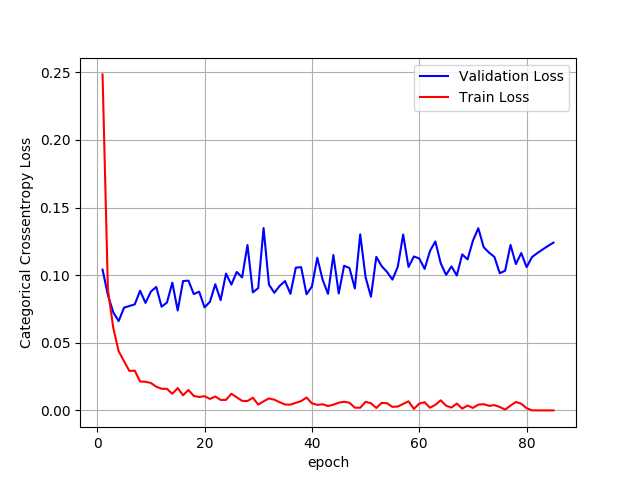

In [27]:
warnings.filterwarnings("ignore")

A6M1_score = arch6_model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A6M1_score[0]) 
print('Test accuracy:', A6M1_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A6M1_history.history['val_loss']
ty = A6M1_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 3.1.1.4 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


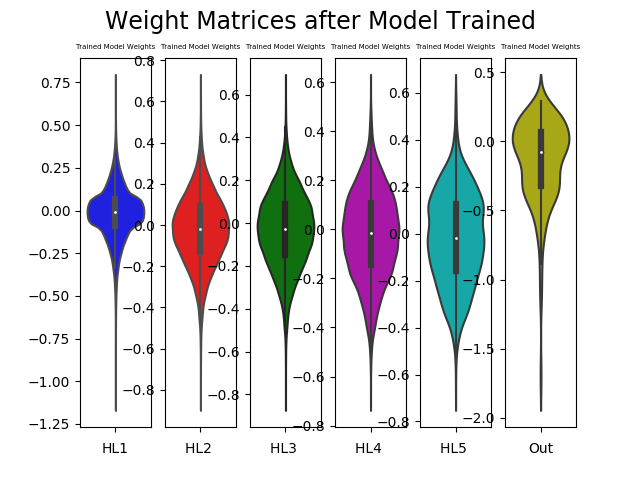

In [30]:
w_after = arch6_model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 6, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL1')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_w, color='g')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=h4_w, color='m')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=h5_w, color='c')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL5 ')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('Out')
plt.show()

<h3> 3.1.2 Model 2 : MLP + BatchNormalization + Adam Optimizer </h3>

<h4> 3.1.2.1 Constructing the Neural Network </h4>

In [32]:
arch6_model2 = Sequential()

arch6_model2.add(Dense(512, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
arch6_model2.add(BatchNormalization())

arch6_model2.add(Dense(256, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.108, maxval=0.108, seed=None)) )
arch6_model2.add(BatchNormalization())

arch6_model2.add(Dense(128, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )
arch6_model2.add(BatchNormalization())

arch6_model2.add(Dense(64, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.216, maxval=0.216, seed=None)) )
arch6_model2.add(BatchNormalization())

arch6_model2.add(Dense(32, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.306, maxval=0.306, seed=None)) )
arch6_model2.add(BatchNormalization())

arch6_model2.add(Dense(output_dim, activation='softmax'))
arch6_model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_12 (Batc (None, 512)               2048      
_________________________________________________________________
dense_28 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)               1024      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_14 (Batc (None, 128)               512       
_________________________________________________________________
dense_30 (Dense)             (None, 64)               

<h4> 3.1.2.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [33]:
arch6_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A6M2_history = arch6_model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 11s 187us/step - loss: 0.2625 - accuracy: 0.9283 - val_loss: 0.1095 - val_accuracy: 0.9661
Epoch 2/85
60000/60000 [==============================] - 10s 168us/step - loss: 0.0931 - accuracy: 0.9720 - val_loss: 0.0864 - val_accuracy: 0.9734
Epoch 3/85
60000/60000 [==============================] - 10s 172us/step - loss: 0.0664 - accuracy: 0.9794 - val_loss: 0.0927 - val_accuracy: 0.9714
Epoch 4/85
60000/60000 [==============================] - 8s 140us/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.1013 - val_accuracy: 0.9705
Epoch 5/85
60000/60000 [==============================] - 9s 145us/step - loss: 0.0436 - accuracy: 0.9862 - val_loss: 0.0940 - val_accuracy: 0.9732
Epoch 6/85
60000/60000 [==============================] - 9s 143us/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0661 - val_accuracy: 0.9800
Epoch 7/85
60000/60000 [==============================] - 9

<h4> 3.1.2.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.0873116682912103
Test accuracy: 0.9836999773979187


<IPython.core.display.Javascript object>


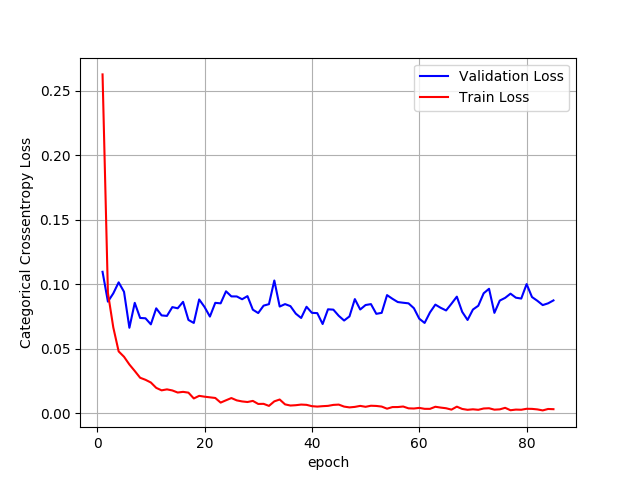

In [34]:
warnings.filterwarnings("ignore")

A6M2_score = arch6_model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A6M2_score[0]) 
print('Test accuracy:', A6M2_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A6M2_history.history['val_loss']
ty = A6M2_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 3.1.2.4 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


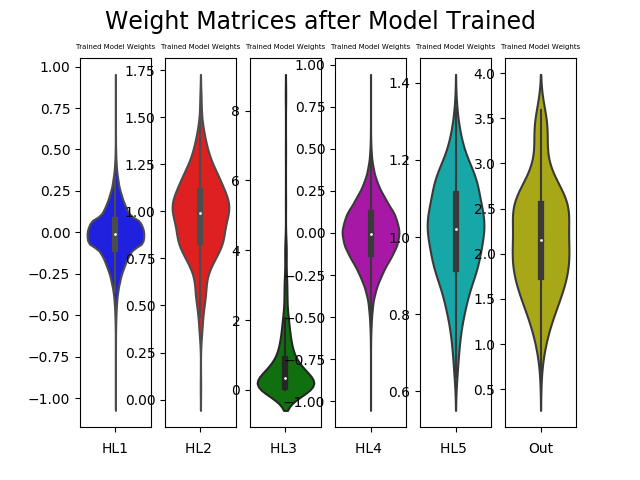

In [35]:
w_after = arch6_model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 6, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL1')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_w, color='g')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=h4_w, color='m')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=h5_w, color='c')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL5 ')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('Out')
plt.show()

<h3> 3.1.3 Model 3 : MLP + BatchNormalization + Dropout + Adam Optimizer </h3>

<h4> 3.1.3.1 Hyperparameter Tuning for Dropout </h4>

In [38]:
def A6M3_best_hyperparameters(dropout):
    arch6_model3 = Sequential()

    arch6_model3.add(Dense(512, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
    arch6_model3.add(BatchNormalization())
    arch6_model3.add(Dropout(dropout))
    
    arch6_model3.add(Dense(256, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.108, maxval=0.108, seed=None)) )
    arch6_model3.add(BatchNormalization())
    arch6_model3.add(Dropout(dropout))
    
    arch6_model3.add(Dense(128, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )
    arch6_model3.add(BatchNormalization())
    arch6_model3.add(Dropout(dropout))
    
    arch6_model3.add(Dense(64, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.216, maxval=0.216, seed=None)) )
    arch6_model3.add(BatchNormalization())
    arch6_model3.add(Dropout(dropout))
    
    arch6_model3.add(Dense(32, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.306, maxval=0.306, seed=None)) )
    arch6_model3.add(BatchNormalization())
    arch6_model3.add(Dropout(dropout))
    
    arch6_model3.add(Dense(output_dim, activation='softmax'))
    
    arch6_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return arch6_model3 

In [39]:
start = datetime.now()

dropout = []

for d in range(1,10):
    dropout.append(d/10)

model = KerasClassifier(build_fn=A6M3_best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(dropout=dropout)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid_5 = GridSearchCV(estimator=model, param_grid=param_grid,cv=3,n_jobs=-1)
grid_result5 = grid_5.fit(X_train, Y_train)

print('Time taken :', datetime.now() - start)

Time taken : 2:48:16.857742


In [40]:
print("Best: %f using %s" % (grid_result5.best_score_, grid_result5.best_params_))
means = grid_result5.cv_results_['mean_test_score']
stds = grid_result5.cv_results_['std_test_score']
params = grid_result5.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982650 using {'dropout': 0.3}
0.981700 (0.001657) with: {'dropout': 0.1}
0.982567 (0.000674) with: {'dropout': 0.2}
0.982650 (0.000389) with: {'dropout': 0.3}
0.981967 (0.001426) with: {'dropout': 0.4}
0.981850 (0.001346) with: {'dropout': 0.5}
0.979950 (0.000991) with: {'dropout': 0.6}
0.975450 (0.001258) with: {'dropout': 0.7}
0.850083 (0.075527) with: {'dropout': 0.8}
0.444717 (0.055117) with: {'dropout': 0.9}


<h4> 3.1.3.2 Constructing the Neural Network </h4>

In [41]:
arch6_model3 = Sequential()

arch6_model3.add(Dense(512, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
arch6_model3.add(BatchNormalization())
arch6_model3.add(Dropout(0.3))
    
arch6_model3.add(Dense(256, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.108, maxval=0.108, seed=None)) )
arch6_model3.add(BatchNormalization())
arch6_model3.add(Dropout(0.3))
    
arch6_model3.add(Dense(128, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )
arch6_model3.add(BatchNormalization())
arch6_model3.add(Dropout(0.3))
    
arch6_model3.add(Dense(64, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.216, maxval=0.216, seed=None)) )
arch6_model3.add(BatchNormalization())
arch6_model3.add(Dropout(0.3))
    
arch6_model3.add(Dense(32, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.306, maxval=0.306, seed=None)) )
arch6_model3.add(BatchNormalization())
arch6_model3.add(Dropout(0.3))

arch6_model3.add(Dense(output_dim, activation='softmax'))
arch6_model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_22 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_13 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)              

<h4> 3.1.3.3 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [42]:
arch6_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A6M3_history = arch6_model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 11s 191us/step - loss: 0.6732 - accuracy: 0.8017 - val_loss: 0.1684 - val_accuracy: 0.9495
Epoch 2/85
60000/60000 [==============================] - 10s 162us/step - loss: 0.2437 - accuracy: 0.9358 - val_loss: 0.1169 - val_accuracy: 0.9662
Epoch 3/85
60000/60000 [==============================] - 10s 171us/step - loss: 0.1910 - accuracy: 0.9504 - val_loss: 0.0970 - val_accuracy: 0.9727
Epoch 4/85
60000/60000 [==============================] - 10s 163us/step - loss: 0.1544 - accuracy: 0.9594 - val_loss: 0.1033 - val_accuracy: 0.9722
Epoch 5/85
60000/60000 [==============================] - 10s 163us/step - loss: 0.1363 - accuracy: 0.9645 - val_loss: 0.0905 - val_accuracy: 0.9745
Epoch 6/85
60000/60000 [==============================] - 10s 163us/step - loss: 0.1218 - accuracy: 0.9683 - val_loss: 0.0844 - val_accuracy: 0.9773
Epoch 7/85
60000/60000 [==============================] 

<h4> 3.1.3.4 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.07269650230827392
Test accuracy: 0.9871000051498413


<IPython.core.display.Javascript object>


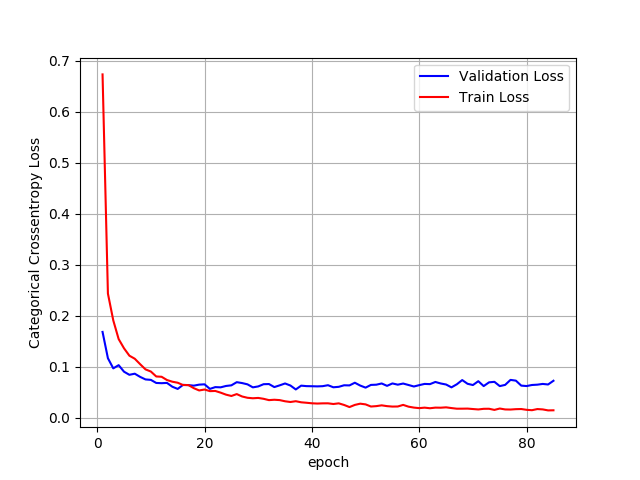

In [43]:
warnings.filterwarnings("ignore")

A6M3_score = arch6_model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A6M3_score[0]) 
print('Test accuracy:', A6M3_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A6M3_history.history['val_loss']
ty = A6M3_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 3.1.3.5 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


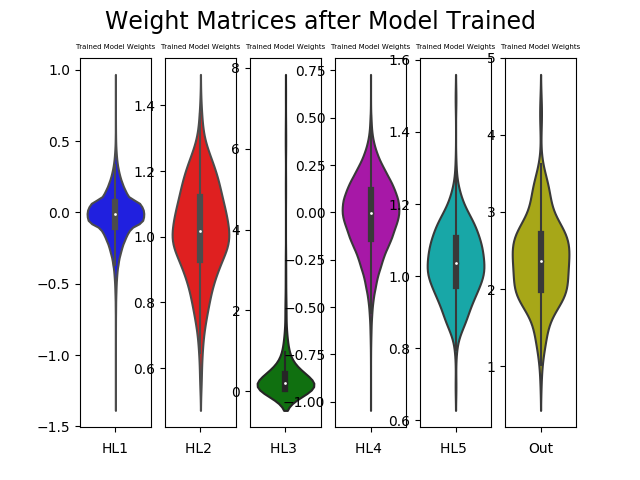

In [44]:
w_after = arch6_model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 6, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL1')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_w, color='g')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=h4_w, color='m')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=h5_w, color='c')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL5 ')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('Out')
plt.show()

<h2> 3.2 Architecture 7 :- 784-360-512-256-128-64-10 </h2>

<h3> 3.2.1 Model 1 : MLP + Adam Optimizer </h3>

<h4> 3.2.1.1 Constructing the Neural Network </h4>

In [45]:
arch7_model1 = Sequential()

arch7_model1.add(Dense(360, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))

arch7_model1.add(Dense(512, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.128, maxval=0.128, seed=None)) )

arch7_model1.add(Dense(256, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.108, maxval=0.108, seed=None)) )

arch7_model1.add(Dense(128, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )

arch7_model1.add(Dense(64, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.216, maxval=0.216, seed=None)) )

arch7_model1.add(Dense(output_dim, activation='softmax'))
arch7_model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 360)               282600    
_________________________________________________________________
dense_46 (Dense)             (None, 512)               184832    
_________________________________________________________________
dense_47 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_48 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_49 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_50 (Dense)             (None, 10)                650       
Total params: 640,562
Trainable params: 640,562
Non-trainable params: 0
________________________________________________

<h4> 3.2.1.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [46]:
arch7_model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A7M1_history = arch7_model1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 7s 124us/step - loss: 0.2350 - accuracy: 0.9298 - val_loss: 0.1096 - val_accuracy: 0.9668
Epoch 2/85
60000/60000 [==============================] - 8s 128us/step - loss: 0.0924 - accuracy: 0.9718 - val_loss: 0.1099 - val_accuracy: 0.9671
Epoch 3/85
60000/60000 [==============================] - 8s 129us/step - loss: 0.0622 - accuracy: 0.9805 - val_loss: 0.0938 - val_accuracy: 0.9695
Epoch 4/85
60000/60000 [==============================] - 8s 134us/step - loss: 0.0480 - accuracy: 0.9847 - val_loss: 0.0995 - val_accuracy: 0.9734
Epoch 5/85
60000/60000 [==============================] - 7s 125us/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0864 - val_accuracy: 0.9764
Epoch 6/85
60000/60000 [==============================] - 7s 122us/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0753 - val_accuracy: 0.9786
Epoch 7/85
60000/60000 [==============================] - 8s 1

<h4> 3.2.1.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.2239265702778512
Test accuracy: 0.9850999712944031


<IPython.core.display.Javascript object>


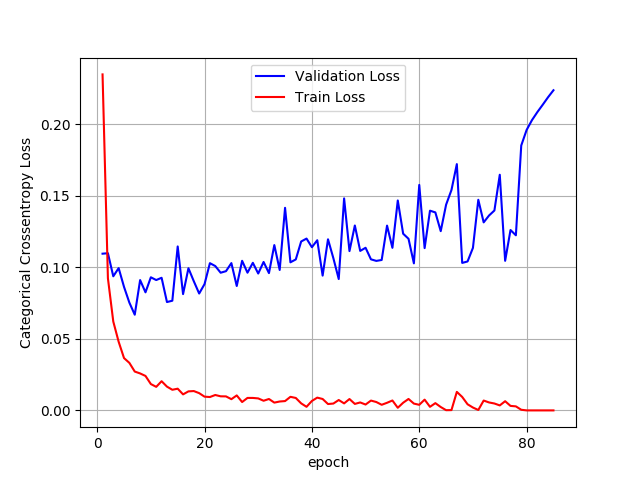

In [47]:
warnings.filterwarnings("ignore")

A7M1_score = arch7_model1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A7M1_score[0]) 
print('Test accuracy:', A7M1_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A7M1_history.history['val_loss']
ty = A7M1_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 3.2.1.4 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


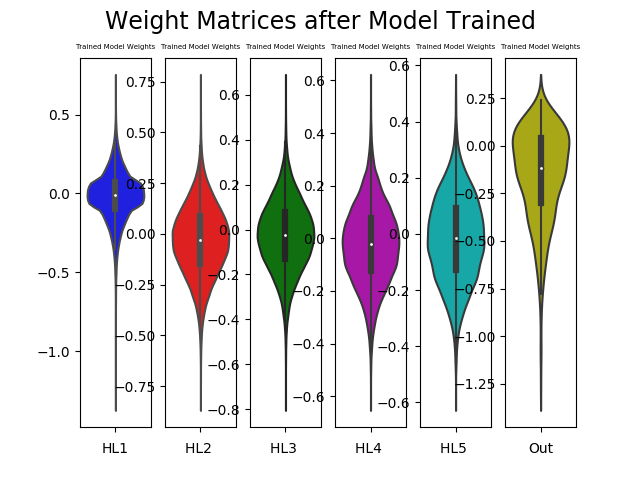

In [48]:
w_after = arch7_model1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 6, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL1')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_w, color='g')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=h4_w, color='m')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=h5_w, color='c')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL5 ')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('Out')
plt.show()

<h3> 3.2.2 Model 2 : MLP + BatchNormalization + Adam Optimizer </h3>

<h4> 3.2.2.1 Constructing the Neural Network </h4>

In [49]:
arch7_model2 = Sequential()

arch7_model2.add(Dense(360, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
arch7_model2.add(BatchNormalization())

arch7_model2.add(Dense(512, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.128, maxval=0.128, seed=None)) )
arch7_model2.add(BatchNormalization())

arch7_model2.add(Dense(256, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.108, maxval=0.108, seed=None)) )
arch7_model2.add(BatchNormalization())

arch7_model2.add(Dense(128, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )
arch7_model2.add(BatchNormalization())

arch7_model2.add(Dense(64, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.216, maxval=0.216, seed=None)) )
arch7_model2.add(BatchNormalization())

arch7_model2.add(Dense(output_dim, activation='softmax'))
arch7_model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 360)               282600    
_________________________________________________________________
batch_normalization_27 (Batc (None, 360)               1440      
_________________________________________________________________
dense_52 (Dense)             (None, 512)               184832    
_________________________________________________________________
batch_normalization_28 (Batc (None, 512)               2048      
_________________________________________________________________
dense_53 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_29 (Batc (None, 256)               1024      
_________________________________________________________________
dense_54 (Dense)             (None, 128)             

<h4> 3.2.2.2 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [50]:
arch7_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A7M2_history = arch7_model2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 12s 199us/step - loss: 0.2217 - accuracy: 0.9344 - val_loss: 0.1084 - val_accuracy: 0.9668
Epoch 2/85
60000/60000 [==============================] - 11s 185us/step - loss: 0.0859 - accuracy: 0.9730 - val_loss: 0.0879 - val_accuracy: 0.9716
Epoch 3/85
60000/60000 [==============================] - 10s 173us/step - loss: 0.0644 - accuracy: 0.9796 - val_loss: 0.0866 - val_accuracy: 0.9723
Epoch 4/85
60000/60000 [==============================] - 10s 164us/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.0836 - val_accuracy: 0.9760
Epoch 5/85
60000/60000 [==============================] - 10s 172us/step - loss: 0.0396 - accuracy: 0.9868 - val_loss: 0.0930 - val_accuracy: 0.9730
Epoch 6/85
60000/60000 [==============================] - 10s 170us/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0819 - val_accuracy: 0.9769
Epoch 7/85
60000/60000 [==============================] 

<h4> 3.2.2.3 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.08006006373140116
Test accuracy: 0.9861999750137329


<IPython.core.display.Javascript object>


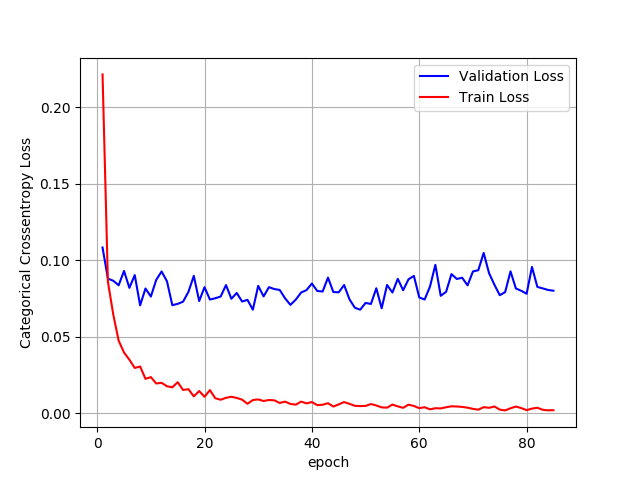

In [51]:
warnings.filterwarnings("ignore")

A7M2_score = arch7_model2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A7M2_score[0]) 
print('Test accuracy:', A7M2_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A7M2_history.history['val_loss']
ty = A7M2_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 3.2.2.4 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


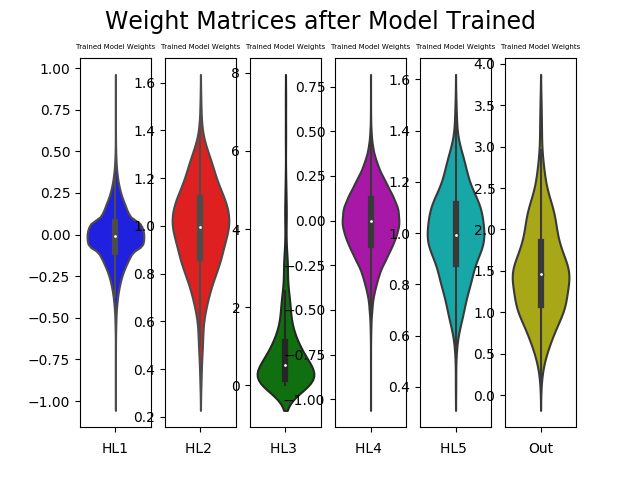

In [52]:
w_after = arch7_model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 6, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL1')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_w, color='g')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=h4_w, color='m')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=h5_w, color='c')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL5 ')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('Out')
plt.show()

<h3> 3.2.3 Model 3 : MLP + BatchNormalization + Dropout + Adam Optimizer </h3>

<h4> 3.2.3.1 Hyperparameter Tuning for Dropout </h4>

In [53]:
def A7M3_best_hyperparameters(dropout):
    
    arch7_model3 = Sequential()

    arch7_model3.add(Dense(360, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
    arch7_model3.add(BatchNormalization())
    arch7_model3.add(Dropout(dropout))
        
    arch7_model3.add(Dense(512, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.128, maxval=0.128, seed=None)) )
    arch7_model3.add(BatchNormalization())
    arch7_model3.add(Dropout(dropout))

    arch7_model3.add(Dense(256, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.108, maxval=0.108, seed=None)) )
    arch7_model3.add(BatchNormalization())
    arch7_model3.add(Dropout(dropout))

    arch7_model3.add(Dense(128, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )
    arch7_model3.add(BatchNormalization())
    arch7_model3.add(Dropout(dropout))

    arch7_model3.add(Dense(64, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.216, maxval=0.216, seed=None)) )
    arch7_model3.add(BatchNormalization())
    arch7_model3.add(Dropout(dropout))

    arch7_model3.add(Dense(output_dim, activation='softmax'))
    
    arch7_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return arch7_model3

In [54]:
from datetime import datetime
start = datetime.now()

dropout = []

for d in range(1,10):
    dropout.append(d/10)

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=A7M3_best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(dropout=dropout)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid_6 = GridSearchCV(estimator=model, param_grid=param_grid,cv=3,n_jobs=-1)
grid_result6 = grid_6.fit(X_train, Y_train)

print('Time taken :', datetime.now() - start)

Time taken : 3:19:49.626629


In [55]:
print("Best: %f using %s" % (grid_result6.best_score_, grid_result6.best_params_))
means = grid_result6.cv_results_['mean_test_score']
stds = grid_result6.cv_results_['std_test_score']
params = grid_result6.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.982283 using {'dropout': 0.3}
0.982017 (0.001226) with: {'dropout': 0.1}
0.981667 (0.000425) with: {'dropout': 0.2}
0.982283 (0.000473) with: {'dropout': 0.3}
0.981583 (0.001000) with: {'dropout': 0.4}
0.981683 (0.000539) with: {'dropout': 0.5}
0.979600 (0.000319) with: {'dropout': 0.6}
0.976050 (0.000604) with: {'dropout': 0.7}
0.940000 (0.031638) with: {'dropout': 0.8}
0.327250 (0.018375) with: {'dropout': 0.9}


<h4> 3.2.3.2 Constructing the Neural Network </h4>

In [56]:
arch7_model3 = Sequential()

arch7_model3.add(Dense(360, activation='relu', input_shape=(input_dim,),\
                      kernel_initializer=RandomUniform(minval= -0.087, maxval = 0.087, seed=None)))
arch7_model3.add(BatchNormalization())
arch7_model3.add(Dropout(0.3))
        
arch7_model3.add(Dense(512, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.128, maxval=0.128, seed=None)) )
arch7_model3.add(BatchNormalization())
arch7_model3.add(Dropout(0.3))

arch7_model3.add(Dense(256, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.108, maxval=0.108, seed=None)) )
arch7_model3.add(BatchNormalization())
arch7_model3.add(Dropout(0.3))

arch7_model3.add(Dense(128, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.153, maxval=0.153, seed=None)) )
arch7_model3.add(BatchNormalization())
arch7_model3.add(Dropout(0.3))

arch7_model3.add(Dense(64, activation='relu', \
                       kernel_initializer=RandomUniform(minval= -0.216, maxval=0.216, seed=None)) )
arch7_model3.add(BatchNormalization())
arch7_model3.add(Dropout(0.3))

arch7_model3.add(Dense(output_dim, activation='softmax'))
arch7_model3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 360)               282600    
_________________________________________________________________
batch_normalization_37 (Batc (None, 360)               1440      
_________________________________________________________________
dropout_22 (Dropout)         (None, 360)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 512)               184832    
_________________________________________________________________
batch_normalization_38 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 256)             

<h4> 3.2.3.3 Running the Neural Network on Train & Validation Datasets for 85 Epochs </h4>

In [57]:
arch7_model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

A7M3_history = arch7_model3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, \
                            validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/85
60000/60000 [==============================] - 14s 234us/step - loss: 0.5253 - accuracy: 0.8410 - val_loss: 0.1621 - val_accuracy: 0.9535
Epoch 2/85
60000/60000 [==============================] - 11s 191us/step - loss: 0.2111 - accuracy: 0.9398 - val_loss: 0.1126 - val_accuracy: 0.9667
Epoch 3/85
60000/60000 [==============================] - 11s 180us/step - loss: 0.1668 - accuracy: 0.9524 - val_loss: 0.0886 - val_accuracy: 0.9730
Epoch 4/85
60000/60000 [==============================] - 11s 184us/step - loss: 0.1378 - accuracy: 0.9600 - val_loss: 0.0857 - val_accuracy: 0.9754
Epoch 5/85
60000/60000 [==============================] - 11s 186us/step - loss: 0.1226 - accuracy: 0.9649 - val_loss: 0.0754 - val_accuracy: 0.9783
Epoch 6/85
60000/60000 [==============================] - 11s 179us/step - loss: 0.1063 - accuracy: 0.9692 - val_loss: 0.0788 - val_accuracy: 0.9771
Epoch 7/85
60000/60000 [==============================] 

<h4> 3.2.3.4 Number of Epochs vs Train Loss & Validation Loss </h4>

Test score: 0.06421894468564132
Test accuracy: 0.9873999953269958


<IPython.core.display.Javascript object>


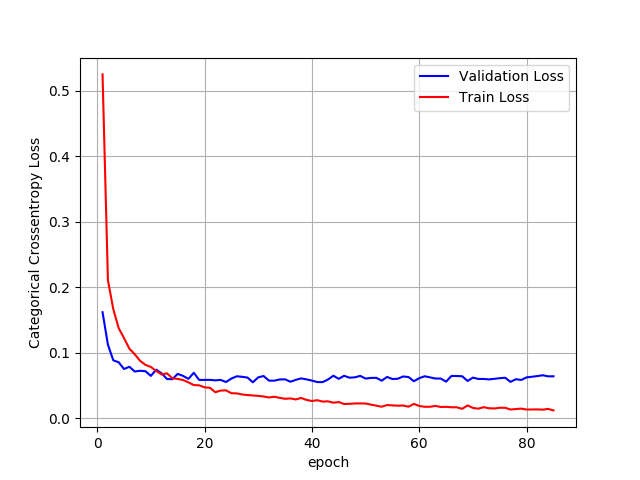

In [58]:
warnings.filterwarnings("ignore")

A7M3_score = arch7_model3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', A7M3_score[0]) 
print('Test accuracy:', A7M3_score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in history.history we will have a list of length equal to number of epochs

vy = A7M3_history.history['val_loss']
ty = A7M3_history.history['loss']
plt_dynamic(x, vy, ty, ax)

<h4> 3.2.3.5 Violin Plots for Hidden Layers in the Models Trained </h4>

<IPython.core.display.Javascript object>


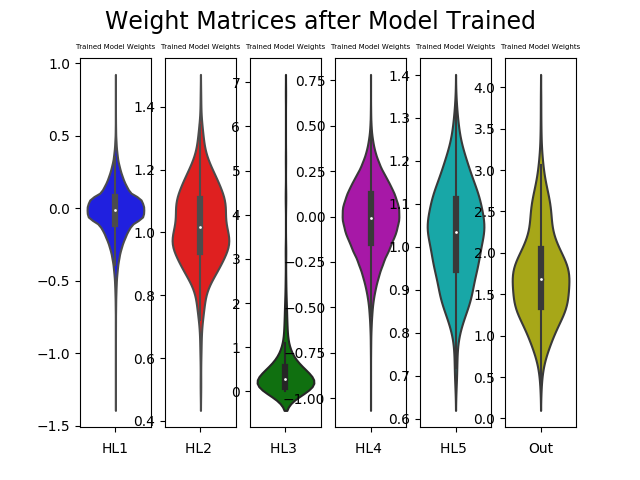

In [59]:
w_after = arch7_model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)

fig = plt.figure()
fig.suptitle('Weight Matrices after Model Trained', fontsize=17)

plt.subplot(1, 6, 1)
ax = sns.violinplot(y=h1_w,color='b')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL1')

plt.subplot(1, 6, 2)
ax = sns.violinplot(y=h2_w, color='r')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL2 ')

plt.subplot(1, 6, 3)
ax = sns.violinplot(y=h3_w, color='g')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL3 ')

plt.subplot(1, 6, 4)
ax = sns.violinplot(y=h4_w, color='m')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL4 ')

plt.subplot(1, 6, 5)
ax = sns.violinplot(y=h5_w, color='c')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('HL5 ')

plt.subplot(1, 6, 6)
ax = sns.violinplot(y=out_w,color='y')
ax.set_title('Trained Model Weights',fontsize= 5) 
plt.xlabel('Out')
plt.show()

# 4. Conclusion

The MNIST Dataset is a dataset of Handwritten Characters pertaining to 10 integers from 0 to 9, which is used for Training in the case of Many Image Processing Tasks. We have an input square image of size (28 px* 28 px), which makes the corresponding vector that we obtain to be 784-dimensional. After this, we obtain a Matrix of this dimensionality where each cell in the Matrix corresponds to an integral number from 0 to 255 -> The Higher is the value of this number, the darker that particular pixel value is. 

There are a total of 60,000 Training Datapoints and a total of 10,000 Test Datapoints in MNIST. We build various models in order to try and minimize our Test Accuracy and Test Log Loss values. We train each of our models on a total of 85 epochs so that the value is not too small for SGD type Optimizations to try and achieve convergence.

First, we work on an architecture with 2 Hidden Layers (784-512-128-10) and employ all of our possible Activations (sigmoid and ReLU) and optimizations on top of it, after which we can easily realise that a ReLU Activation and an Adam Optimizer is going to give us the best result, which is the reason why we only employ these model types on our remaining architectures. We work on 3 models for each of the architectures that we build : Simple Model with ReLU and Adam, a model with Batch Normalization added and the other also having a Dropout Value. For all of these cases, we are carrying out weight initialization with the help of He-Uniform, which is a very good technique for ReLUs as well as Leaky ReLUs.

We know that Batch Normalization acts as a Weak Regularizer, which is the reason that we also need a Dropout value. We could have added a Dropout value only in the deeper layers of a Neural Network, however, we add the same after every layer in this case. Dropout Value is a Hyperparameter that we tune with the help of GridSearchCV (integrating both keras as well as sklearn).

A couple of important parameters is the number of layers in a Neural Network as well as the number of neurons in each layer. Since our input is 784 dimensional and the output softmax is 10 dimensional, these numbers will remain constant. But we can try various values ie. each layer would have a neuron count in the range of (10-784).There is no clear consensus on what is the best way to make this decision, except to try out various architectures. That is the reason why we try multiple architectures across 2,3 and 5 hidden layers.

We are training all the models on a fix number of 85 epochs for each model for better comparison. However, for each model we also compare the Loss Value across different epoch numbers for Train and Validation Datasets, so as to the Epoch Number for which this loss is minimum. Along with this, we also need to ensure that the gap between the Train and Validation curves in this plot is not too big, which would indicate overfitting in such a scenario. After this, we also plot the weight distribution across different hidden layers and the output layer with the help of a violin plot. 

The Summary of each of our models that we have built so far is as shown below :

In [6]:
from prettytable import PrettyTable

x=PrettyTable()
x.field_names=["Arch #","Model","Test Accuracy","Test Log Loss"]

print ("Metrics for a 2 Hidden Layer Architecture - 784-512-128-10 after 85 Epochs :")
print("="*100)

x.add_row(["Arch 1","Softmax Classifier (Single Layer)", "92.15%","0.2856"])
x.add_row(["Arch 1","MLP + Sigmoid + SGD", "91.97%","0.2764"])
x.add_row(["Arch 1","MLP + Sigmoid + Adam", "98.40%","0.0970"])
x.add_row(["Arch 1","MLP + ReLU (He-Normal) + SGD", "97.71%","0.0722"])
x.add_row(["Arch 1","MLP + ReLU (He-Normal) + Adam", "98.41%","0.1379"])
x.add_row(["Arch 1","MLP + ReLU (He-Normal) + BN + Adam", "97.74%","0.1269"])
x.add_row(["Arch 1","MLP + ReLU (He-Normal) + BN + Dropout + Adam", "98.33%","0.0667"])

print(x)

print('-'*100)

y=PrettyTable()
y.field_names=["Arch #","Architecture","Model","Test Accuracy","Test Log Loss"]

print ("Metrics for other 2 Hidden Layer Architectures after 85 Epochs :")
print("="*100)

y.add_row(["Arch 2","784-500-125-10","MLP + ReLU (He-Uniform) + Adam", "98.70%","0.1176"])
y.add_row(["Arch 2","784-500-125-10","MLP + ReLU (He-Uniform) + BN + Adam", "98.22%","0.1126"])
y.add_row(["Arch 2","784-500-125-10","MLP + ReLU (He-Uniform) + BN + Dropout + Adam", "98.55%","0.0670"])
y.add_row(["Arch 3","784-256-64-10","MLP + ReLU (He-Uniform) + Adam", "98.21%","0.1540"])
y.add_row(["Arch 3","784-500-125-10","MLP + ReLU (He-Uniform) + BN + Adam", "98.22%","0.1126"])
y.add_row(["Arch 3","784-500-125-10","MLP + ReLU (He-Uniform) + BN + Dropout + Adam", "98.55%","0.0670"])
print(y)

print('-'*100)

z=PrettyTable()
z.field_names=["Arch #","Architecture","Model","Test Accuracy","Test Log Loss"]

print ("Metrics for 3 Hidden Layer Architectures after 85 Epochs :")
print("="*100)

z.add_row(["Arch 4","784-512-256-128-10","MLP + ReLU (He-Uniform) + Adam", "98.52%","0.1345"])
z.add_row(["Arch 4","784-512-256-128-10","MLP + ReLU (He-Uniform) + BN + Adam", "98.52%","0.0853"])
z.add_row(["Arch 4","784-512-256-128-10","MLP + ReLU (He-Uniform) + BN + Dropout + Adam", "98.44%","0.0677"])
z.add_row(["Arch 5","784-500-250-125-10","MLP + ReLU (He-Uniform) + Adam", "98.58%","0.1482"])
z.add_row(["Arch 5","784-500-250-125-10","MLP + ReLU (He-Uniform) + BN + Adam", "98.33%","0.0980"])
z.add_row(["Arch 5","784-500-250-125-10","MLP + ReLU (He-Uniform) + BN + Dropout + Adam", "98.60%","0.0669"])
print(z)

print('-'*100)

a=PrettyTable()
a.field_names=["Arch #","Architecture","Model","Test Accuracy","Test Log Loss"]

print ("Metrics for 5 Hidden Layer Architectures after 85 Epochs :")
print("="*100)

a.add_row(["Arch 6","784-512-256-128-64-32-10","MLP + ReLU (He-Uniform) + Adam", "98.54%","0.1241"])
a.add_row(["Arch 6","784-512-256-128-64-32-10","MLP + ReLU (He-Uniform) + BN + Adam", "98.37%","0.0873"])
a.add_row(["Arch 6","784-512-256-128-64-32-10","MLP + ReLU (He-Uniform) + BN + Dropout + Adam", "98.71%","0.0727"])
a.add_row(["Arch 7","784-360-512-256-128-64-10","MLP + ReLU (He-Uniform) + Adam", "98.51%","0.2239"])
a.add_row(["Arch 7","784-360-512-256-128-64-10","MLP + ReLU (He-Uniform) + BN + Adam", "98.62%","0.0801"])
a.add_row(["Arch 7","784-360-512-256-128-64-10","MLP + ReLU (He-Uniform) + BN + Dropout + Adam", "98.74%","0.0642"])
print(a)

Metrics for a 2 Hidden Layer Architecture - 784-512-128-10 after 85 Epochs :
+--------+----------------------------------------------+---------------+---------------+
| Arch # |                    Model                     | Test Accuracy | Test Log Loss |
+--------+----------------------------------------------+---------------+---------------+
| Arch 1 |      Softmax Classifier (Single Layer)       |     92.15%    |     0.2856    |
| Arch 1 |             MLP + Sigmoid + SGD              |     91.97%    |     0.2764    |
| Arch 1 |             MLP + Sigmoid + Adam             |     98.40%    |     0.0970    |
| Arch 1 |         MLP + ReLU (He-Normal) + SGD         |     97.71%    |     0.0722    |
| Arch 1 |        MLP + ReLU (He-Normal) + Adam         |     98.41%    |     0.1379    |
| Arch 1 |      MLP + ReLU (He-Normal) + BN + Adam      |     97.74%    |     0.1269    |
| Arch 1 | MLP + ReLU (He-Normal) + BN + Dropout + Adam |     98.33%    |     0.0667    |
+--------+-------------